In [1]:
import sys
from os.path import isfile
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
from scipy import stats
import random
import logging
from add_spikes import add_spikes
from shift_spectrum import shift_spectrum
from get_redshift import get_redshift
import os
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler

In [2]:
# -- Logging info
logging.basicConfig(filename='modifications.txt', level=logging.INFO,
                    format='%(asctime)s - %(message)s', filemode='w')

In [3]:
def modify(spectrum, sn_name, delay_phase):
    # --Error handling
    if not isinstance(spectrum, np.ndarray):
        raise TypeError(f"Error: Expected 'np.ndarray', got {type(spectrum).__name__}")
    if not isinstance(sn_name, str):
        raise TypeError(f"Error: Expected 'str', got {type(sn_name).__name__}")
    if not isinstance(delay_phase, float):
        raise TypeError(f"Error: Expected 'float', got {type(delay_phase).__name__}")

    # --Copy spectrum and log basic information
    modified_spectrum = spectrum.copy()
    logging.info(f'Object: {sn_name}, phase delay: {delay_phase}')

    # --Prepare modification details
    modification_details = {
        'Object': sn_name,
        'Phase Delay': delay_phase,
        'Modification Type': '',
        'Redshift Applied': False,
        'Spikes Added': False
    }

    # --Apply modifications
    modifications = random.randint(0, 3)
    if modifications == 0:
        logging.info('---Modifications: None')
        modification_details['Modification Type'] = 'None'
    else:
        try:
            redshift = get_redshift(sn_name)  # Intentar obtener el redshift
            modification_details['Redshift Applied'] = True
        except Exception as e:
            logging.warning(f"Warning: No se encontró redshift para {sn_name}. Detalle: {e}")
            redshift = 0.001  # Valor de redshift alternativo si no se encuentra el original
            logging.info(f'Usando redshift alternativo: {redshift}')

        if modifications == 1:
            logging.info('---Modifications: Shift spectra on x axis only')
            modified_spectrum = shift_spectrum(spectrum, redshift)
            modification_details['Modification Type'] = 'Shift Spectrum'
        elif modifications == 2:
            logging.info('---Modifications: Add spikes only')
            modified_spectrum = add_spikes(spectrum, redshift)
            modification_details['Modification Type'] = 'Add Spikes'
            modification_details['Spikes Added'] = True
        elif modifications == 3:
            logging.info('---Modifications: Shift spectra on x axis AND add spikes')
            modified_spectrum = add_spikes(shift_spectrum(spectrum, redshift), redshift)
            modification_details['Modification Type'] = 'Shift and Add Spikes'
            modification_details['Spikes Added'] = True

    # Convert details dictionary to a DataFrame
    modification_table = pd.DataFrame([modification_details])


    return modified_spectrum, modification_table

In [37]:
np.random.seed(3312)
url = "https://github.com/juanserrano90/codelatam/raw/main/Data/data/sn_data.parquet"
df_raw = pd.read_parquet(url)
wavelength = np.array([float(c) for c in df_raw.columns[5:]])
column_names = df_raw.columns.values.tolist()
column_names = np.array(column_names[5:]).astype(float)


In [5]:
data_aumentation_plan = pd.DataFrame(columns=['Type', 'N° of Copys'])

data_aumentation_plan['Type'] = ['IIP', 'IIn', 'Ic-pec', 'Ibn', 'Ib-pec','IIL']
data_aumentation_plan['N° of Copys'] = [41, 153 , 184, 186, 202, 204]

In [7]:
np.random.seed(1)
modified = []
modification_tables = pd.DataFrame()

for i in data_aumentation_plan['Type']:
    print(f"Procesando tipo: {i}")
    
    # Selecciona el subtipo a aumentar
    df_loc = df_raw[df_raw['SN Subtype'] == i]
    
    # Selecciona el número de copias necesarias
    n = data_aumentation_plan[data_aumentation_plan['Type'] == i]['N° of Copys'].values[0]

    # Contador para asegurar el número de copias por subtipo
    count = 0

    # Bucle para asegurar el número de copias deseado
    while count < n:
        # Selecciona una muestra
        df_loc_sampled = df_loc.sample(n=1, replace=True)
        
        # Aplica las modificaciones:
        for index, row in df_loc_sampled.iterrows():
            sn_name = index
            try:
                # Obtiene el valor de 'Spectral Phase'
                delay_phases = row['Spectral Phase']
                
                # Intenta obtener la muestra correspondiente de df_raw
                sample = df_raw.loc[(df_raw.index == sn_name)].iloc[:, 5:].values[0]

                # Modifica el espectro y guarda la tabla de modificaciones
                mod_spectrum, mod_table = modify(sample, sn_name, delay_phases)
                modified.append(mod_spectrum)
                modification_tables = pd.concat([modification_tables,mod_table])

                # Incrementa el contador solo si se genera una modificación
                count += 1

            except IndexError as e:
                print(f"Error: No se encontró un valor para la supernova {sn_name}. Detalle: {e}")
            except KeyError as e:
                print(f"Error: Columna no encontrada en la fila de {sn_name}. Detalle: {e}")
            except Exception as e:
                print(f"Error inesperado para {sn_name}. Detalle: {e}")




    

Procesando tipo: IIP
Central wavelength: 6250.781896383187 Å
Redshift variation: 0.0010994369621877738
Wavelength shift: 6.872340659457863 Å
Pixel shift: 0
Central wavelength: 6250.781896383187 Å
Redshift variation: 0.0009793161454592053
Wavelength shift: 6.121491632872164 Å
Pixel shift: 0
Central wavelength: 6250.781896383187 Å
Redshift variation: 0.0009691121454086096
Wavelength shift: 6.057708654085207 Å
Pixel shift: 0
Central wavelength: 6250.781896383187 Å
Redshift variation: 0.0010871078141612063
Wavelength shift: 6.795273844175566 Å
Pixel shift: 0
Central wavelength: 6250.781896383187 Å
Redshift variation: 0.0010601489137351072
Wavelength shift: 6.626759637445709 Å
Pixel shift: 0
Central wavelength: 6250.781896383187 Å
Redshift variation: 0.0009823575757938105
Wavelength shift: 6.140502950546825 Å
Pixel shift: 0
Central wavelength: 6250.781896383187 Å
Redshift variation: 0.0009631031262012127
Wavelength shift: 6.0201475856085915 Å
Pixel shift: 0
Central wavelength: 6250.78189638

Central wavelength: 6250.781896383187 Å
Redshift variation: 0.001059932238658746
Wavelength shift: 6.625405248800993 Å
Pixel shift: 0
Central wavelength: 6250.781896383187 Å
Redshift variation: 0.0009905706999903076
Wavelength shift: 6.1918413985870355 Å
Pixel shift: 0
Central wavelength: 6250.781896383187 Å
Redshift variation: 0.0010863722233273082
Wavelength shift: 6.790675826307891 Å
Pixel shift: 0
Central wavelength: 6250.781896383187 Å
Redshift variation: 0.0010148688448136
Wavelength shift: 6.3437238023641696 Å
Pixel shift: 0
Central wavelength: 6250.781896383187 Å
Redshift variation: 0.0010281810510574284
Wavelength shift: 6.426935500154011 Å
Pixel shift: 0
Central wavelength: 6250.781896383187 Å
Redshift variation: 0.0009454619472569378
Wavelength shift: 5.909876423632863 Å
Pixel shift: 0
Central wavelength: 6250.781896383187 Å
Redshift variation: 0.0009302312078695982
Wavelength shift: 5.814672393601949 Å
Pixel shift: 0
Central wavelength: 6250.781896383187 Å
Redshift variatio

Central wavelength: 6250.781896383187 Å
Redshift variation: 0.0010684891619912827
Wavelength shift: 6.678892710256752 Å
Pixel shift: 0
Central wavelength: 6250.781896383187 Å
Redshift variation: 0.0009128860511159214
Wavelength shift: 5.706251601776138 Å
Pixel shift: 0
Central wavelength: 6250.781896383187 Å
Redshift variation: 0.0010249656273152987
Wavelength shift: 6.406836587637506 Å
Pixel shift: 0
Central wavelength: 6250.781896383187 Å
Redshift variation: 0.0010023194594011332
Wavelength shift: 6.265280331217187 Å
Pixel shift: 0
Central wavelength: 6250.781896383187 Å
Redshift variation: 0.0010468382878295833
Wavelength shift: 6.543557818005931 Å
Pixel shift: 0
Central wavelength: 6250.781896383187 Å
Redshift variation: 0.0010175743012592374
Wavelength shift: 6.360635020536012 Å
Pixel shift: 0
Central wavelength: 6250.781896383187 Å
Redshift variation: 0.000997043002106679
Wavelength shift: 6.232298347483972 Å
Pixel shift: 0
Central wavelength: 6250.781896383187 Å
Redshift variati

Central wavelength: 6250.781896383187 Å
Redshift variation: 0.0010421479139799174
Wavelength shift: 6.514239314059171 Å
Pixel shift: 0
Procesando tipo: Ibn
Central wavelength: 6250.781896383187 Å
Redshift variation: 0.0009480269810412298
Wavelength shift: 5.925909890375326 Å
Pixel shift: 0
Central wavelength: 6250.781896383187 Å
Redshift variation: 0.000925286178057937
Wavelength shift: 5.783762090778143 Å
Pixel shift: 0
Central wavelength: 6250.781896383187 Å
Redshift variation: 0.0009716645702365611
Wavelength shift: 6.073663304991646 Å
Pixel shift: 0
Central wavelength: 6250.781896383187 Å
Redshift variation: 0.0010784774977831437
Wavelength shift: 6.741327618799513 Å
Pixel shift: 0
Central wavelength: 6250.781896383187 Å
Redshift variation: 0.0010045271377640465
Wavelength shift: 6.279080047161122 Å
Pixel shift: 0
Central wavelength: 6250.781896383187 Å
Redshift variation: 0.0010566322036123202
Wavelength shift: 6.604777449475365 Å
Pixel shift: 0
Central wavelength: 6250.7818963831

Central wavelength: 6250.781896383187 Å
Redshift variation: 0.001043317609358947
Wavelength shift: 6.521550824758691 Å
Pixel shift: 0
Central wavelength: 6250.781896383187 Å
Redshift variation: 0.0009858880599837483
Wavelength shift: 6.162571237206755 Å
Pixel shift: 0
Central wavelength: 6250.781896383187 Å
Redshift variation: 0.0010149879454555532
Wavelength shift: 6.344468274500738 Å
Pixel shift: 0
Central wavelength: 6250.781896383187 Å
Redshift variation: 0.0009827381472398203
Wavelength shift: 6.142881819651824 Å
Pixel shift: 0
Central wavelength: 6250.781896383187 Å
Redshift variation: 0.0009025045673772947
Wavelength shift: 5.641359211165134 Å
Pixel shift: 0
Central wavelength: 6250.781896383187 Å
Redshift variation: 0.0010846006081507331
Wavelength shift: 6.779601846234797 Å
Pixel shift: 0
Central wavelength: 6250.781896383187 Å
Redshift variation: 0.0009815978369053457
Wavelength shift: 6.13575398845683 Å
Pixel shift: 0
Central wavelength: 6250.781896383187 Å
Redshift variatio

Central wavelength: 6250.781896383187 Å
Redshift variation: 0.001025688275957519
Wavelength shift: 6.411353706687742 Å
Pixel shift: 0
Central wavelength: 6250.781896383187 Å
Redshift variation: 0.0010476823741209214
Wavelength shift: 6.548834017314813 Å
Pixel shift: 0
Central wavelength: 6250.781896383187 Å
Redshift variation: 0.0010256678262029922
Wavelength shift: 6.411225879732361 Å
Pixel shift: 0
Central wavelength: 6250.781896383187 Å
Redshift variation: 0.0010752002384730145
Wavelength shift: 6.720842185634004 Å
Pixel shift: 0
Central wavelength: 6250.781896383187 Å
Redshift variation: 0.0009426494136975312
Wavelength shift: 5.8922958897767534 Å
Pixel shift: 0
Central wavelength: 6250.781896383187 Å
Redshift variation: 0.0009465830936767663
Wavelength shift: 5.916884465377121 Å
Pixel shift: 0
Central wavelength: 6250.781896383187 Å
Redshift variation: 0.000947571137448244
Wavelength shift: 5.923060511496708 Å
Pixel shift: 0
Central wavelength: 6250.781896383187 Å
Redshift variati

Central wavelength: 6250.781896383187 Å
Redshift variation: 0.0010164430084278616
Wavelength shift: 6.35356355578614 Å
Pixel shift: 0
Central wavelength: 6250.781896383187 Å
Redshift variation: 0.0009572495585652371
Wavelength shift: 5.983558211000381 Å
Pixel shift: 0
Central wavelength: 6250.781896383187 Å
Redshift variation: 0.0009461113105457318
Wavelength shift: 5.913935451922632 Å
Pixel shift: 0
Central wavelength: 6250.781896383187 Å
Redshift variation: 0.0009388790041009446
Wavelength shift: 5.868727881728461 Å
Pixel shift: 0
Central wavelength: 6250.781896383187 Å
Redshift variation: 0.0009064105098068856
Wavelength shift: 5.665774405392336 Å
Pixel shift: 0
Central wavelength: 6250.781896383187 Å
Redshift variation: 0.0009497047693915716
Wavelength shift: 5.936397379421606 Å
Pixel shift: 0
Central wavelength: 6250.781896383187 Å
Redshift variation: 0.0010291766774835284
Wavelength shift: 6.4331589437938375 Å
Pixel shift: 0
Central wavelength: 6250.781896383187 Å
Redshift variat

Central wavelength: 6250.781896383187 Å
Redshift variation: 0.0010154366758140631
Wavelength shift: 6.347273190102069 Å
Pixel shift: 0
Central wavelength: 6250.781896383187 Å
Redshift variation: 0.0009717486705596516
Wavelength shift: 6.074188997768699 Å
Pixel shift: 0
Central wavelength: 6250.781896383187 Å
Redshift variation: 0.0010766807303935544
Wavelength shift: 6.730096417728657 Å
Pixel shift: 0
Central wavelength: 6250.781896383187 Å
Redshift variation: 0.0009811548077088147
Wavelength shift: 6.132984709575585 Å
Pixel shift: 0
Central wavelength: 6250.781896383187 Å
Redshift variation: 0.0009957595387113504
Wavelength shift: 6.224275697727783 Å
Pixel shift: 0
Central wavelength: 6250.781896383187 Å
Redshift variation: 0.0010663768704714412
Wavelength shift: 6.665689236664643 Å
Pixel shift: 0
Central wavelength: 6250.781896383187 Å
Redshift variation: 0.0009830582983109165
Wavelength shift: 6.14488301417114 Å
Pixel shift: 0
Central wavelength: 6250.781896383187 Å
Redshift variati

In [21]:
modification_tables

,Object,Phase Delay,Modification Type,Redshift Applied,Spikes Added
0,sn1999em,119.0,Add Spikes,False,True
0,sn2005cs,0.1,Shift Spectrum,False,False
0,sn2005cs,13.8,Shift and Add Spikes,False,True
0,sn1999em,-3.6,Add Spikes,False,True
0,sn1992H,112.9,Shift and Add Spikes,False,True
...,...,...,...,...,...
0,sn1980K,66.0,Add Spikes,False,True
0,sn1980K,12.0,None,False,False
0,sn1980K,44.0,None,False,False
0,sn1979C,71.6,Shift and Add Spikes,False,True


In [22]:
modification_tables.to_csv('Modification_II.csv', index=False)

In [23]:
if isinstance(modified, list):
    # Extraer el primer array de cada elemento
    extracted_arrays = []
    for item in modified:
        if isinstance(item, tuple):
            extracted_arrays.append(item[0])  # Toma el primer array de la tupla
        elif isinstance(item, np.ndarray):
            extracted_arrays.append(item)  # Toma directamente el array si es un array
        else:
            print(f"Elemento ignorado: {item}, tipo: {type(item)}")
    
    # Convertir los arrays extraídos a un DataFrame
    modified_df = pd.DataFrame(extracted_arrays)
    
    # Exportar a CSV
    modified_df.to_csv('II-copy.csv', index=False)
    print("Archivo CSV generado exitosamente.")
else:
    print("Error: 'modified' no es una lista.")

Archivo CSV generado exitosamente.


# Leer los df y concadenarlos a la tabla principal

In [72]:
Iapec = pd.read_csv('Ia-peculiars-copy.csv')
II = pd.read_csv('II-copy.csv')

In [73]:
nuevos_nombres = [f'{i}' for i in wavelength]
Iapec.columns = nuevos_nombres
II.columns = nuevos_nombres

In [74]:
#Marcar las copias

Iapec['COPY'] =True
II['COPY'] = True

In [75]:
#Leer las tablas numpy :

modification_iapec = pd.read_csv('Modification_Ia_pec.csv')
modification_ii = pd.read_csv('Modification_II.csv')

In [76]:
#Concadenar hacia al lado

snIapec = pd.concat([Iapec, modification_iapec], axis=1)
snii = pd.concat([II, modification_ii], axis=1)

In [77]:
#df_raw = df_raw.reset_index()
df_raw = df_raw.rename(columns={'SN Name': 'Object'})
df_raw

,index,Object,SN Subtype,SN Subtype ID,SN Maintype,SN Maintype ID,Spectral Phase,2501.69,2505.08,2508.48,...,9872.21,9885.59,9898.98,9912.39,9925.82,9939.27,9952.73,9966.21,9979.71,9993.24
0,0,sn2008ar,Ia-norm,0,Ia,0,-8.50,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,sn2008ar,Ia-norm,0,Ia,0,-7.50,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,sn2008ar,Ia-norm,0,Ia,0,-6.60,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,sn2008ar,Ia-norm,0,Ia,0,-4.60,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,sn2008ar,Ia-norm,0,Ia,0,-3.70,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4996,4996,sn2007uy,Ib-pec,9,Ib,1,12.82,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4997,4997,sn2007uy,Ib-pec,9,Ib,1,45.82,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4998,4998,sn2007uy,Ib-pec,9,Ib,1,54.82,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4999,4999,sn2007uy,Ib-pec,9,Ib,1,75.82,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [78]:
df_raw_m = df_raw[['Object','SN Subtype ID', 'SN Maintype ID']]

In [85]:
#df_reset = df_raw_m.reset_index()
df_reset = df_reset[['Object', 'SN Subtype ID', 'SN Maintype ID']]

In [86]:
df_reseteada = df_reset.rename(columns={'SN Name': 'Object'})
df_reseteada

,Object,SN Subtype ID,SN Maintype ID
0,sn2008ar,0,0
1,sn2008ar,0,0
2,sn2008ar,0,0
3,sn2008ar,0,0
4,sn2008ar,0,0
...,...,...,...
4996,sn2007uy,9,1
4997,sn2007uy,9,1
4998,sn2007uy,9,1
4999,sn2007uy,9,1


In [87]:
df_reseteada= df_reseteada.drop_duplicates()
df_reseteada

,Object,SN Subtype ID,SN Maintype ID
0,sn2008ar,0,0
18,sn1999ac,1,0
52,sn1998dk,0,0
61,sn2005gj,3,0
83,sn04eo,0,0
...,...,...,...
4944,sn2000er,7,1
4949,sn2005ek,12,2
4955,sn2007ru,11,2
4966,sn2003jd,11,2


In [88]:
df_reseteada

,Object,SN Subtype ID,SN Maintype ID
0,sn2008ar,0,0
18,sn1999ac,1,0
52,sn1998dk,0,0
61,sn2005gj,3,0
83,sn04eo,0,0
...,...,...,...
4944,sn2000er,7,1
4949,sn2005ek,12,2
4955,sn2007ru,11,2
4966,sn2003jd,11,2


In [89]:
snIapec_1 = snIapec.set_index('Object').join(df_reseteada.set_index('Object'))
snii_1 = snii.set_index('Object').join(df_reseteada.set_index('Object'))

In [90]:
snIapec_1 = snIapec_1.reset_index()
snii_1 = snii_1.reset_index()


In [92]:
snIapec_1 = snIapec_1.dropna()

In [94]:
snii_1

,Object,2501.69,2505.08,2508.48,2511.87,2515.28,2518.69,2522.1,2525.51,2528.94,...,9966.21,9979.71,9993.24,COPY,Spectral Phase,Modification Type,Redshift Applied,Spikes Added,SN Subtype ID,SN Maintype ID
0,sn1979C,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,True,10.90,Shift and Add Spikes,False,True,14,3
1,sn1979C,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,True,9.90,Shift and Add Spikes,False,True,14,3
2,sn1979C,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,True,10.90,Shift and Add Spikes,False,True,14,3
3,sn1979C,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,True,12.90,Add Spikes,False,True,14,3
4,sn1979C,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,True,10.90,Shift and Add Spikes,False,True,14,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
965,sn2007uy,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,True,45.82,Shift and Add Spikes,False,True,9,1
966,sn2007uy,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,True,-13.18,Shift and Add Spikes,False,True,9,1
967,sn2007uy,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,True,-11.18,Shift Spectrum,False,False,9,1
968,sn2007uy,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,True,12.82,None,False,False,9,1


# Hacer el df por clases

- Revisar que la clase 0 tenga 2387 elementos
- Unir el df 1 con el df1 de las copias
- Elegir los datos del df2 para generar imagenes 

In [95]:
#DF0
df_raw_0 = df_raw[df_raw['SN Subtype ID']== 0]
df_raw_0 

,index,Object,SN Subtype,SN Subtype ID,SN Maintype,SN Maintype ID,Spectral Phase,2501.69,2505.08,2508.48,...,9872.21,9885.59,9898.98,9912.39,9925.82,9939.27,9952.73,9966.21,9979.71,9993.24
0,0,sn2008ar,Ia-norm,0,Ia,0,-8.500,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,sn2008ar,Ia-norm,0,Ia,0,-7.500,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,sn2008ar,Ia-norm,0,Ia,0,-6.600,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,sn2008ar,Ia-norm,0,Ia,0,-4.600,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,sn2008ar,Ia-norm,0,Ia,0,-3.700,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3992,3992,sn1990O,Ia-norm,0,Ia,0,-5.600,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3993,3993,sn1990O,Ia-norm,0,Ia,0,-0.900,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3994,3994,sn1990O,Ia-norm,0,Ia,0,18.600,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3995,3995,sn1990O,Ia-norm,0,Ia,0,19.400,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [97]:
#DF1
df_raw_1 = df_raw[(df_raw['SN Subtype ID']== 1) | (df_raw['SN Subtype ID']== 2) | (df_raw['SN Subtype ID']== 3) |
                  (df_raw['SN Subtype ID']== 4) | (df_raw['SN Subtype ID']== 5)]
df_raw_1 =  pd.concat([df_raw_1, snIapec_1], axis=0)
df_raw_1

/Users/valentina/anaconda3/lib/python3.10/site-packages/IPython/lib/pretty.py:778: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  output = repr(obj)
/Users/valentina/anaconda3/lib/python3.10/site-packages/IPython/core/formatters.py:342: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  return method()


,index,Object,SN Subtype,SN Subtype ID,SN Maintype,SN Maintype ID,Spectral Phase,2501.69,2505.08,2508.48,...,9939.27,9952.73,9966.21,9979.71,9993.24,COPY,Phase Delay,Modification Type,Redshift Applied,Spikes Added
18,18.0,sn1999ac,Ia-91T,1,Ia,0,-13.9,0.0,0.0,0.0,...,0.001,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
19,19.0,sn1999ac,Ia-91T,1,Ia,0,-12.9,0.0,0.0,0.0,...,0.000,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
20,20.0,sn1999ac,Ia-91T,1,Ia,0,-9.9,0.0,0.0,0.0,...,0.000,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
21,21.0,sn1999ac,Ia-91T,1,Ia,0,-3.9,0.0,0.0,0.0,...,0.000,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
22,22.0,sn1999ac,Ia-91T,1,Ia,0,-2.9,0.0,0.0,0.0,...,0.000,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1480,NaN,sn99da,NaN,2,NaN,0,NaN,0.0,0.0,0.0,...,0.000,0.0,0.0,0.0,0.0,True,36.907,None,False,False
1481,NaN,snls03D3bb,NaN,5,NaN,0,NaN,0.0,0.0,0.0,...,0.000,0.0,0.0,0.0,0.0,True,2.000,Shift and Add Spikes,False,True
1482,NaN,snls03D3bb,NaN,5,NaN,0,NaN,0.0,0.0,0.0,...,0.000,0.0,0.0,0.0,0.0,True,2.000,Add Spikes,False,True
1483,NaN,snls03D3bb,NaN,5,NaN,0,NaN,0.0,0.0,0.0,...,0.000,0.0,0.0,0.0,0.0,True,2.000,Shift and Add Spikes,False,True


In [98]:
#DF2

#Elegir 217 de cada clase que tiene exceso
df_raw_8 = df_raw[df_raw['SN Subtype ID']==8].sample(n=217)
df_raw_11 = df_raw[df_raw['SN Subtype ID']==11].sample(n=217)
df_raw_6 = df_raw[df_raw['SN Subtype ID']==6].sample(n=217)
df_raw_10 = df_raw[df_raw['SN Subtype ID']==10].sample(n=217)
df_raw_16 = df_raw[df_raw['SN Subtype ID']==16].sample(n=217)

#Agregar las clases que faltan sin seleccionar
df_raw_13 = df_raw[df_raw['SN Subtype ID']==13]
df_raw_15 = df_raw[df_raw['SN Subtype ID']==15]
df_raw_12 = df_raw[df_raw['SN Subtype ID']==12]
df_raw_7 = df_raw[df_raw['SN Subtype ID']==7]
df_raw_9 = df_raw[df_raw['SN Subtype ID']==9]
df_raw_14 = df_raw[df_raw['SN Subtype ID']==14]


#Concadenar los df incluyendo el de las copias
II_completo = pd.concat([df_raw_8, df_raw_11, df_raw_6, df_raw_10, df_raw_16, 
                        df_raw_13, df_raw_15, df_raw_12, df_raw_7, df_raw_9, df_raw_14, 
                        snii_1], axis=0)

In [99]:
II_completo

/Users/valentina/anaconda3/lib/python3.10/site-packages/IPython/lib/pretty.py:778: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  output = repr(obj)
/Users/valentina/anaconda3/lib/python3.10/site-packages/IPython/core/formatters.py:342: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  return method()


,index,Object,SN Subtype,SN Subtype ID,SN Maintype,SN Maintype ID,Spectral Phase,2501.69,2505.08,2508.48,...,9925.82,9939.27,9952.73,9966.21,9979.71,9993.24,COPY,Modification Type,Redshift Applied,Spikes Added
4244,4244.0,sn1993J,IIb,8,Ib,1,277.00,0.0,0.0,0.0,...,0.000,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
4558,4558.0,sn2011dh,IIb,8,Ib,1,68.40,0.0,0.0,0.0,...,0.000,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
4815,4815.0,sn2008ax,IIb,8,Ib,1,-12.00,0.0,0.0,0.0,...,0.000,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
4003,4003.0,sn2013df,IIb,8,Ib,1,4.23,0.0,0.0,0.0,...,-0.001,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
4395,4395.0,sn1996cb,IIb,8,Ib,1,147.90,0.0,0.0,0.0,...,0.000,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
965,NaN,sn2007uy,NaN,9,NaN,1,45.82,0.0,0.0,0.0,...,0.000,0.0,0.0,0.0,0.0,0.0,True,Shift and Add Spikes,False,True
966,NaN,sn2007uy,NaN,9,NaN,1,-13.18,0.0,0.0,0.0,...,0.000,0.0,0.0,0.0,0.0,0.0,True,Shift and Add Spikes,False,True
967,NaN,sn2007uy,NaN,9,NaN,1,-11.18,0.0,0.0,0.0,...,0.000,0.0,0.0,0.0,0.0,0.0,True,Shift Spectrum,False,False
968,NaN,sn2007uy,NaN,9,NaN,1,12.82,0.0,0.0,0.0,...,0.000,0.0,0.0,0.0,0.0,0.0,True,None,False,False


In [100]:
#Concaderas todos

main = pd.concat([df_raw_0, df_raw_1, II_completo], axis=0)
main = main.reset_index(drop=True)

In [101]:
main

/Users/valentina/anaconda3/lib/python3.10/site-packages/IPython/lib/pretty.py:778: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  output = repr(obj)
/Users/valentina/anaconda3/lib/python3.10/site-packages/IPython/core/formatters.py:342: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  return method()


,index,Object,SN Subtype,SN Subtype ID,SN Maintype,SN Maintype ID,Spectral Phase,2501.69,2505.08,2508.48,...,9939.27,9952.73,9966.21,9979.71,9993.24,COPY,Phase Delay,Modification Type,Redshift Applied,Spikes Added
0,0.0,sn2008ar,Ia-norm,0,Ia,0,-8.50,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
1,1.0,sn2008ar,Ia-norm,0,Ia,0,-7.50,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
2,2.0,sn2008ar,Ia-norm,0,Ia,0,-6.60,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
3,3.0,sn2008ar,Ia-norm,0,Ia,0,-4.60,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,4.0,sn2008ar,Ia-norm,0,Ia,0,-3.70,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7155,NaN,sn2007uy,NaN,9,NaN,1,45.82,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,True,NaN,Shift and Add Spikes,False,True
7156,NaN,sn2007uy,NaN,9,NaN,1,-13.18,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,True,NaN,Shift and Add Spikes,False,True
7157,NaN,sn2007uy,NaN,9,NaN,1,-11.18,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,True,NaN,Shift Spectrum,False,False
7158,NaN,sn2007uy,NaN,9,NaN,1,12.82,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,True,NaN,None,False,False


In [124]:
main_wavelenght = main.iloc[:, 6:1030]
main_wavelenght 

,2501.69,2505.08,2508.48,2511.87,2515.28,2518.69,2522.1,2525.51,2528.94,2532.36,...,9858.86,9872.21,9885.59,9898.98,9912.39,9925.82,9939.27,9952.73,9966.21,9979.71
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7155,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7156,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7157,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7158,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [194]:
# Asegurarse de que todas las columnas tienen nombres de tipo string
#scalings ={}

main_wavelength.columns = main_wavelength.columns.astype(str)

# Ahora puedes aplicar el escalado
#scalings['minmax'] = minmax_scaler.fit_transform(main_wavelenght )

# Convertir a DataFrame para mantener las columnas originales
main_wavelength_scaled = pd.DataFrame(scalings['minmax'], columns=main_wavelenght .columns)

main_wavelength_scaled

,2501.69,2505.08,2508.48,2511.87,2515.28,2518.69,2522.1,2525.51,2528.94,2532.36,...,9872.21,9885.59,9898.98,9912.39,9925.82,9939.27,9952.73,9966.21,9979.71,9993.24
0,0.0,0.0,0.0,0.333333,0.25,0.347826,0.166667,0.438596,0.333333,0.223301,...,0.388158,0.198953,0.453846,0.287671,0.25,0.266667,0.25,0.333333,0.0,0.0
1,0.0,0.0,0.0,0.333333,0.25,0.347826,0.166667,0.438596,0.333333,0.223301,...,0.388158,0.198953,0.453846,0.287671,0.25,0.266667,0.25,0.333333,0.0,0.0
2,0.0,0.0,0.0,0.333333,0.25,0.347826,0.166667,0.438596,0.333333,0.223301,...,0.388158,0.198953,0.453846,0.287671,0.25,0.266667,0.25,0.333333,0.0,0.0
3,0.0,0.0,0.0,0.333333,0.25,0.347826,0.166667,0.438596,0.333333,0.223301,...,0.388158,0.198953,0.453846,0.287671,0.25,0.266667,0.25,0.333333,0.0,0.0
4,0.0,0.0,0.0,0.333333,0.25,0.347826,0.166667,0.438596,0.333333,0.223301,...,0.388158,0.198953,0.453846,0.287671,0.25,0.266667,0.25,0.333333,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7155,0.0,0.0,0.0,0.333333,0.25,0.347826,0.166667,0.438596,0.333333,0.223301,...,0.388158,0.198953,0.453846,0.287671,0.25,0.266667,0.25,0.333333,0.0,0.0
7156,0.0,0.0,0.0,0.333333,0.25,0.347826,0.166667,0.438596,0.333333,0.223301,...,0.388158,0.198953,0.453846,0.287671,0.25,0.266667,0.25,0.333333,0.0,0.0
7157,0.0,0.0,0.0,0.333333,0.25,0.347826,0.166667,0.438596,0.333333,0.223301,...,0.388158,0.198953,0.453846,0.287671,0.25,0.266667,0.25,0.333333,0.0,0.0
7158,0.0,0.0,0.0,0.333333,0.25,0.347826,0.166667,0.438596,0.333333,0.223301,...,0.388158,0.198953,0.453846,0.287671,0.25,0.266667,0.25,0.333333,0.0,0.0


In [113]:
main

/Users/valentina/anaconda3/lib/python3.10/site-packages/IPython/lib/pretty.py:778: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  output = repr(obj)
/Users/valentina/anaconda3/lib/python3.10/site-packages/IPython/core/formatters.py:342: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  return method()


,index,Object,SN Subtype,SN Subtype ID,SN Maintype,SN Maintype ID,Spectral Phase,2501.69,2505.08,2508.48,...,9952.73,9966.21,9979.71,9993.24,COPY,Phase Delay,Modification Type,Redshift Applied,Spikes Added,Name
0,0.0,sn2008ar,Ia-norm,0,Ia,0,-8.50,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,sn2008ar_0_0_-8.5_0.png
1,1.0,sn2008ar,Ia-norm,0,Ia,0,-7.50,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,sn2008ar_0_0_-7.5_1.png
2,2.0,sn2008ar,Ia-norm,0,Ia,0,-6.60,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,sn2008ar_0_0_-6.6_2.png
3,3.0,sn2008ar,Ia-norm,0,Ia,0,-4.60,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,sn2008ar_0_0_-4.6_3.png
4,4.0,sn2008ar,Ia-norm,0,Ia,0,-3.70,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,sn2008ar_0_0_-3.7_4.png
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7155,NaN,sn2007uy,NaN,9,NaN,1,45.82,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,True,NaN,Shift and Add Spikes,False,True,sn2007uy_9_1_45.82_7155_COPY.png
7156,NaN,sn2007uy,NaN,9,NaN,1,-13.18,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,True,NaN,Shift and Add Spikes,False,True,sn2007uy_9_1_-13.18_7156_COPY.png
7157,NaN,sn2007uy,NaN,9,NaN,1,-11.18,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,True,NaN,Shift Spectrum,False,False,sn2007uy_9_1_-11.18_7157_COPY.png
7158,NaN,sn2007uy,NaN,9,NaN,1,12.82,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,True,NaN,None,False,False,sn2007uy_9_1_12.82_7158_COPY.png


In [121]:
# Hacerles el nombre
main['Name'] = main['Object'] + '_' + main['SN Subtype ID'].astype(str) + '_' + \
               main['SN Maintype ID'].astype(str) + '_' + main['Spectral Phase'].astype(str) + '_' + \
               main.index.astype(str)

# Agregar "COPY" si la columna 'copy' es True
main['Name'] = main.apply(lambda row: row['Name'] + '_COPY' if row['COPY'] ==True else row['Name'], axis=1)

# Agregar la extensión ".png" al final de la cadena
main['Name'] = main['Name'] + '.png'

# Ver el resultado
print(main[['Name']])

                                   Name
0               sn2008ar_0_0_-8.5_0.png
1               sn2008ar_0_0_-7.5_1.png
2               sn2008ar_0_0_-6.6_2.png
3               sn2008ar_0_0_-4.6_3.png
4               sn2008ar_0_0_-3.7_4.png
...                                 ...
7155   sn2007uy_9_1_45.82_7155_COPY.png
7156  sn2007uy_9_1_-13.18_7156_COPY.png
7157  sn2007uy_9_1_-11.18_7157_COPY.png
7158   sn2007uy_9_1_12.82_7158_COPY.png
7159   sn2007uy_9_1_12.82_7159_COPY.png

[7160 rows x 1 columns]


In [133]:
main_wavelenght_t = main_wavelenght.T


In [134]:
main_wavelenght_t.columns = main['Name']
main_wavelenght_t

Name,sn2008ar_0_0_-8.5_0.png,sn2008ar_0_0_-7.5_1.png,sn2008ar_0_0_-6.6_2.png,sn2008ar_0_0_-4.6_3.png,sn2008ar_0_0_-3.7_4.png,sn2008ar_0_0_-2.7_5.png,sn2008ar_0_0_-1.7_6.png,sn2008ar_0_0_-0.7_7.png,sn2008ar_0_0_1.2_8.png,sn2008ar_0_0_3.1_9.png,...,sn2007uy_9_1_45.82_7150_COPY.png,sn2007uy_9_1_-5.18_7151_COPY.png,sn2007uy_9_1_-11.18_7152_COPY.png,sn2007uy_9_1_12.82_7153_COPY.png,sn2007uy_9_1_45.82_7154_COPY.png,sn2007uy_9_1_45.82_7155_COPY.png,sn2007uy_9_1_-13.18_7156_COPY.png,sn2007uy_9_1_-11.18_7157_COPY.png,sn2007uy_9_1_12.82_7158_COPY.png,sn2007uy_9_1_12.82_7159_COPY.png
2501.69,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2505.08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2508.48,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2511.87,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2515.28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9925.82,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9939.27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9952.73,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9966.21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [145]:
cd ..


/Users/valentina/codelatam/DataPreparation


In [146]:
cd ..

/Users/valentina/codelatam


In [147]:
ls

Data/            DataPreparation/ README.md        Training/


In [148]:
cd Data

/Users/valentina/codelatam/Data


In [149]:
mkdir augmented_images_v1

In [150]:
cd augmented_images_v1/

/Users/valentina/codelatam/Data/augmented_images_v1


In [157]:
ls


0/ 1/ 2/


In [156]:
mkdir 2

In [168]:
for i in range(0, len(main_wavelenght_t.columns)):
    # Definir el DPI y el tamaño de la figura
    my_dpi = 100
    print(i)
    
    # Crear la figura
    fig, ax = plt.subplots(figsize=(2.65, 2.65), dpi=my_dpi)
    
    # Graficar la columna de datos
    ax.plot(wavelength, main_wavelenght_t.iloc[:, i].values, lw=1, ls='-', color='k', alpha=1)
    
    # Configurar los ejes y la apariencia
    ax.axis('off')
    ax.set_xlim(2500, 10000)
    # ax.set_ylim(0, 1)  # Descomentarlo si es necesario
    ax.set_box_aspect(1)
    
    # Extraer el primer número después del primer guion bajo en el nombre de la columna
    first_num = int(main_wavelenght_t.columns[i].split('_')[1])
    
    # Determinar la carpeta de destino según el valor de first_num
    if first_num == 0:
        target_folder = '0'
    elif 1 <= first_num <= 5:
        target_folder = '1'
    else:
        target_folder = '2'
    
    # Guardar la imagen con el nombre de la columna en la carpeta correspondiente
    file_path = os.path.join(target_folder, f'{main_wavelenght_t.columns[i]}')
    plt.savefig(file_path, bbox_inches='tight', dpi=my_dpi)

    # Cerrar la figura después de guardar
    plt.close()
    
    print(f'Imagen guardada en {file_path}')

0
Imagen guardada en 0/sn2008ar_0_0_-8.5_0.png
1
Imagen guardada en 0/sn2008ar_0_0_-7.5_1.png
2
Imagen guardada en 0/sn2008ar_0_0_-6.6_2.png
3
Imagen guardada en 0/sn2008ar_0_0_-4.6_3.png
4
Imagen guardada en 0/sn2008ar_0_0_-3.7_4.png
5
Imagen guardada en 0/sn2008ar_0_0_-2.7_5.png
6
Imagen guardada en 0/sn2008ar_0_0_-1.7_6.png
7
Imagen guardada en 0/sn2008ar_0_0_-0.7_7.png
8
Imagen guardada en 0/sn2008ar_0_0_1.2_8.png
9
Imagen guardada en 0/sn2008ar_0_0_3.1_9.png
10
Imagen guardada en 0/sn2008ar_0_0_4.1_10.png
11
Imagen guardada en 0/sn2008ar_0_0_5.0_11.png
12
Imagen guardada en 0/sn2008ar_0_0_7.2_12.png
13
Imagen guardada en 0/sn2008ar_0_0_22.6_13.png
14
Imagen guardada en 0/sn2008ar_0_0_25.7_14.png
15
Imagen guardada en 0/sn2008ar_0_0_28.4_15.png
16
Imagen guardada en 0/sn2008ar_0_0_55.6_16.png
17
Imagen guardada en 0/sn2008ar_0_0_105.1_17.png
18
Imagen guardada en 0/sn1998dk_0_0_10.2_18.png
19
Imagen guardada en 0/sn1998dk_0_0_11.1_19.png
20
Imagen guardada en 0/sn1998dk_0_0_13.1_20

Imagen guardada en 0/sn2001ay_0_0_7.8_176.png
177
Imagen guardada en 0/sn2001ay_0_0_9.0_177.png
178
Imagen guardada en 0/sn2001ay_0_0_16.5_178.png
179
Imagen guardada en 0/sn2001ay_0_0_22.6_179.png
180
Imagen guardada en 0/sn2001ay_0_0_23.3_180.png
181
Imagen guardada en 0/sn2001ay_0_0_29.4_181.png
182
Imagen guardada en 0/sn2001ay_0_0_29.5_182.png
183
Imagen guardada en 0/sn2001ay_0_0_30.4_183.png
184
Imagen guardada en 0/sn2001ay_0_0_31.4_184.png
185
Imagen guardada en 0/sn2001ay_0_0_31.4_185.png
186
Imagen guardada en 0/sn2001ay_0_0_36.3_186.png
187
Imagen guardada en 0/sn2001ay_0_0_54.6_187.png
188
Imagen guardada en 0/sn2001ay_0_0_54.7_188.png
189
Imagen guardada en 0/sn06cq_0_0_1.914_189.png
190
Imagen guardada en 0/sn2001bg_0_0_4.2_190.png
191
Imagen guardada en 0/sn2001bg_0_0_5.1_191.png
192
Imagen guardada en 0/sn2001bg_0_0_10.0_192.png
193
Imagen guardada en 0/sn2001bg_0_0_14.0_193.png
194
Imagen guardada en 0/sn2001bg_0_0_19.0_194.png
195
Imagen guardada en 0/sn1999X_0_0_12.

Imagen guardada en 0/sn1991M_0_0_80.0_343.png
344
Imagen guardada en 0/sn1991M_0_0_111.8_344.png
345
Imagen guardada en 0/sn07af_0_0_-1.209_345.png
346
Imagen guardada en 0/sn07af_0_0_3.852_346.png
347
Imagen guardada en 0/sn07af_0_0_26.491_347.png
348
Imagen guardada en 0/sn07af_0_0_91.057_348.png
349
Imagen guardada en 0/sn07af_0_0_113.823_349.png
350
Imagen guardada en 0/sn07af_0_0_121.788_350.png
351
Imagen guardada en 0/sn2007af_0_0_-5.6_351.png
352
Imagen guardada en 0/sn2007af_0_0_-4.6_352.png
353
Imagen guardada en 0/sn2007af_0_0_-3.6_353.png
354
Imagen guardada en 0/sn2007af_0_0_-2.6_354.png
355
Imagen guardada en 0/sn2007af_0_0_-1.6_355.png
356
Imagen guardada en 0/sn2007af_0_0_-0.6_356.png
357
Imagen guardada en 0/sn2007af_0_0_0.3_357.png
358
Imagen guardada en 0/sn2007af_0_0_2.3_358.png
359
Imagen guardada en 0/sn2007af_0_0_3.3_359.png
360
Imagen guardada en 0/sn2007af_0_0_4.3_360.png
361
Imagen guardada en 0/sn2007af_0_0_5.4_361.png
362
Imagen guardada en 0/sn2007af_0_0_10

Imagen guardada en 0/sn2003cg_0_0_7.7_507.png
508
Imagen guardada en 0/sn2003cg_0_0_8.8_508.png
509
Imagen guardada en 0/sn2003cg_0_0_9.2_509.png
510
Imagen guardada en 0/sn2003cg_0_0_9.8_510.png
511
Imagen guardada en 0/sn2003cg_0_0_10.8_511.png
512
Imagen guardada en 0/sn2003cg_0_0_11.0_512.png
513
Imagen guardada en 0/sn2003cg_0_0_11.9_513.png
514
Imagen guardada en 0/sn2003cg_0_0_15.9_514.png
515
Imagen guardada en 0/sn2003cg_0_0_18.9_515.png
516
Imagen guardada en 0/sn2003cg_0_0_22.9_516.png
517
Imagen guardada en 0/sn2003cg_0_0_22.9_517.png
518
Imagen guardada en 0/sn2003cg_0_0_25.9_518.png
519
Imagen guardada en 0/sn2003cg_0_0_26.7_519.png
520
Imagen guardada en 0/sn2003cg_0_0_28.0_520.png
521
Imagen guardada en 0/sn2003cg_0_0_37.8_521.png
522
Imagen guardada en 0/sn2003cg_0_0_42.9_522.png
523
Imagen guardada en 0/sn2003cg_0_0_51.9_523.png
524
Imagen guardada en 0/sn2003cg_0_0_382.6_524.png
525
Imagen guardada en 0/sn1996ab_0_0_1.3_525.png
526
Imagen guardada en 0/sn1998aq_0_0_-

Imagen guardada en 0/sn04ef_0_0_8.053_679.png
680
Imagen guardada en 0/sn04ef_0_0_31.228_680.png
681
Imagen guardada en 0/sn04ef_0_0_84.596_681.png
682
Imagen guardada en 0/sn2003kf_0_0_-9.4_682.png
683
Imagen guardada en 0/sn2003kf_0_0_-9.3_683.png
684
Imagen guardada en 0/sn2003kf_0_0_-8.4_684.png
685
Imagen guardada en 0/sn2003kf_0_0_-7.4_685.png
686
Imagen guardada en 0/sn2003kf_0_0_-5.4_686.png
687
Imagen guardada en 0/sn2003kf_0_0_-3.4_687.png
688
Imagen guardada en 0/sn2003kf_0_0_8.5_688.png
689
Imagen guardada en 0/sn2003kf_0_0_10.4_689.png
690
Imagen guardada en 0/sn2003kf_0_0_13.4_690.png
691
Imagen guardada en 0/sn2003kf_0_0_14.4_691.png
692
Imagen guardada en 0/sn2003kf_0_0_15.4_692.png
693
Imagen guardada en 0/sn2003kf_0_0_17.4_693.png
694
Imagen guardada en 0/sn2003kf_0_0_18.4_694.png
695
Imagen guardada en 0/sn2003kf_0_0_19.4_695.png
696
Imagen guardada en 0/sn2003kf_0_0_20.3_696.png
697
Imagen guardada en 0/sn2003kf_0_0_21.3_697.png
698
Imagen guardada en 0/sn2003kf_0_0

Imagen guardada en 0/sn2004at_0_0_-4.7_844.png
845
Imagen guardada en 0/sn2004at_0_0_-3.6_845.png
846
Imagen guardada en 0/sn2004at_0_0_-0.7_846.png
847
Imagen guardada en 0/sn2004at_0_0_0.2_847.png
848
Imagen guardada en 0/sn2004at_0_0_1.2_848.png
849
Imagen guardada en 0/sn2004at_0_0_2.2_849.png
850
Imagen guardada en 0/sn2004at_0_0_17.8_850.png
851
Imagen guardada en 0/sn2004at_0_0_29.6_851.png
852
Imagen guardada en 0/sn1998co_0_0_0.0_852.png
853
Imagen guardada en 0/sn1998co_0_0_1.0_853.png
854
Imagen guardada en 0/sn1998co_0_0_3.9_854.png
855
Imagen guardada en 0/sn1998co_0_0_6.9_855.png
856
Imagen guardada en 0/sn1998co_0_0_22.5_856.png
857
Imagen guardada en 0/sn1998co_0_0_24.6_857.png
858
Imagen guardada en 0/sn1998co_0_0_28.4_858.png
859
Imagen guardada en 0/sn1981B_0_0_-1.5_859.png
860
Imagen guardada en 0/sn1981B_0_0_15.4_860.png
861
Imagen guardada en 0/sn1981B_0_0_18.3_861.png
862
Imagen guardada en 0/sn1981B_0_0_22.3_862.png
863
Imagen guardada en 0/sn1981B_0_0_26.3_863.

Imagen guardada en 0/sn1995al_0_0_67.9_1011.png
1012
Imagen guardada en 0/sn1995al_0_0_93.8_1012.png
1013
Imagen guardada en 0/sn2000E_0_0_-6.4_1013.png
1014
Imagen guardada en 0/sn2000E_0_0_-3.4_1014.png
1015
Imagen guardada en 0/sn2000E_0_0_-2.3_1015.png
1016
Imagen guardada en 0/sn2000E_0_0_7.5_1016.png
1017
Imagen guardada en 0/sn2000E_0_0_117.6_1017.png
1018
Imagen guardada en 0/sn2000E_0_0_119.7_1018.png
1019
Imagen guardada en 0/sn2000E_0_0_120.3_1019.png
1020
Imagen guardada en 0/sn02er_0_0_-11.3_1020.png
1021
Imagen guardada en 0/sn02er_0_0_-9.4_1021.png
1022
Imagen guardada en 0/sn02er_0_0_-8.4_1022.png
1023
Imagen guardada en 0/sn02er_0_0_-7.4_1023.png
1024
Imagen guardada en 0/sn02er_0_0_-6.4_1024.png
1025
Imagen guardada en 0/sn02er_0_0_-5.4_1025.png
1026
Imagen guardada en 0/sn02er_0_0_-4.4_1026.png
1027
Imagen guardada en 0/sn02er_0_0_-3.5_1027.png
1028
Imagen guardada en 0/sn02er_0_0_-2.5_1028.png
1029
Imagen guardada en 0/sn02er_0_0_-1.5_1029.png
1030
Imagen guardada e

Imagen guardada en 0/sn94ae_0_0_64.0_1174.png
1175
Imagen guardada en 0/sn94ae_0_0_70.0_1175.png
1176
Imagen guardada en 0/sn94ae_0_0_87.8_1176.png
1177
Imagen guardada en 0/sn94ae_0_0_123.6_1177.png
1178
Imagen guardada en 0/sn94ae_0_0_153.4_1178.png
1179
Imagen guardada en 0/sn94ae_0_0_367.7_1179.png
1180
Imagen guardada en 0/sn2006cq_0_0_-3.3_1180.png
1181
Imagen guardada en 0/sn05de_0_0_-0.748_1181.png
1182
Imagen guardada en 0/sn05de_0_0_10.097_1182.png
1183
Imagen guardada en 0/sn05de_0_0_25.745_1183.png
1184
Imagen guardada en 0/sn05de_0_0_40.49_1184.png
1185
Imagen guardada en 0/sn2007au_0_0_-5.6_1185.png
1186
Imagen guardada en 0/sn2007au_0_0_-4.7_1186.png
1187
Imagen guardada en 0/sn2007au_0_0_-3.8_1187.png
1188
Imagen guardada en 0/sn2007au_0_0_1.1_1188.png
1189
Imagen guardada en 0/sn06ef_0_0_3.197_1189.png
1190
Imagen guardada en 0/sn06ef_0_0_28.707_1190.png
1191
Imagen guardada en 0/sn06ef_0_0_34.559_1191.png
1192
Imagen guardada en 0/sn1998V_0_0_0.3_1192.png
1193
Imagen 

Imagen guardada en 0/sn1996bo_0_0_3.3_1341.png
1342
Imagen guardada en 0/sn1996bo_0_0_5.2_1342.png
1343
Imagen guardada en 0/sn1996bo_0_0_7.1_1343.png
1344
Imagen guardada en 0/sn1996bo_0_0_9.2_1344.png
1345
Imagen guardada en 0/sn1996bo_0_0_11.1_1345.png
1346
Imagen guardada en 0/sn2001gc_0_0_-8.5_1346.png
1347
Imagen guardada en 0/sn2001gc_0_0_3.4_1347.png
1348
Imagen guardada en 0/sn2001gc_0_0_4.4_1348.png
1349
Imagen guardada en 0/sn2001gc_0_0_5.3_1349.png
1350
Imagen guardada en 0/sn2001gc_0_0_7.3_1350.png
1351
Imagen guardada en 0/sn2001gc_0_0_13.3_1351.png
1352
Imagen guardada en 0/sn2001gc_0_0_18.2_1352.png
1353
Imagen guardada en 0/sn2001gc_0_0_22.0_1353.png
1354
Imagen guardada en 0/sn02er_0_0_-4.246_1354.png
1355
Imagen guardada en 0/sn02er_0_0_5.594_1355.png
1356
Imagen guardada en 0/sn02er_0_0_23.444_1356.png
1357
Imagen guardada en 0/sn02er_0_0_60.977_1357.png
1358
Imagen guardada en 0/sn2000bk_0_0_11.9_1358.png
1359
Imagen guardada en 0/sn2000bk_0_0_18.8_1359.png
1360
Im

Imagen guardada en 0/sn2003du_0_0_-2.2_1505.png
1506
Imagen guardada en 0/sn2003du_0_0_-1.8_1506.png
1507
Imagen guardada en 0/sn2003du_0_0_-1.3_1507.png
1508
Imagen guardada en 0/sn2003du_0_0_-0.3_1508.png
1509
Imagen guardada en 0/sn2003du_0_0_0.9_1509.png
1510
Imagen guardada en 0/sn2003du_0_0_1.1_1510.png
1511
Imagen guardada en 0/sn2003du_0_0_2.1_1511.png
1512
Imagen guardada en 0/sn2003du_0_0_2.9_1512.png
1513
Imagen guardada en 0/sn2003du_0_0_4.0_1513.png
1514
Imagen guardada en 0/sn2003du_0_0_6.9_1514.png
1515
Imagen guardada en 0/sn2003du_0_0_7.9_1515.png
1516
Imagen guardada en 0/sn2003du_0_0_8.8_1516.png
1517
Imagen guardada en 0/sn2003du_0_0_9.8_1517.png
1518
Imagen guardada en 0/sn2003du_0_0_12.7_1518.png
1519
Imagen guardada en 0/sn2003du_0_0_16.0_1519.png
1520
Imagen guardada en 0/sn2003du_0_0_16.8_1520.png
1521
Imagen guardada en 0/sn2003du_0_0_17.9_1521.png
1522
Imagen guardada en 0/sn2003du_0_0_18.6_1522.png
1523
Imagen guardada en 0/sn2003du_0_0_19.0_1523.png
1524
Im

Imagen guardada en 0/sn2007le_0_0_48.2_1672.png
1673
Imagen guardada en 0/sn2007le_0_0_50.1_1673.png
1674
Imagen guardada en 0/sn2007le_0_0_53.1_1674.png
1675
Imagen guardada en 0/sn2007le_0_0_67.0_1675.png
1676
Imagen guardada en 0/sn2007le_0_0_77.9_1676.png
1677
Imagen guardada en 0/sn07fs_0_0_5.029_1677.png
1678
Imagen guardada en 0/sn07fs_0_0_22.667_1678.png
1679
Imagen guardada en 0/sn07fs_0_0_29.494_1679.png
1680
Imagen guardada en 0/sn07fs_0_0_36.374_1680.png
1681
Imagen guardada en 0/sn07fs_0_0_51.127_1681.png
1682
Imagen guardada en 0/sn07fs_0_0_91.354_1682.png
1683
Imagen guardada en 0/sn2005cf_0_0_-12.4_1683.png
1684
Imagen guardada en 0/sn2005cf_0_0_-11.7_1684.png
1685
Imagen guardada en 0/sn2005cf_0_0_-11.4_1685.png
1686
Imagen guardada en 0/sn2005cf_0_0_-11.2_1686.png
1687
Imagen guardada en 0/sn2005cf_0_0_-10.4_1687.png
1688
Imagen guardada en 0/sn2005cf_0_0_-10.2_1688.png
1689
Imagen guardada en 0/sn2005cf_0_0_-9.7_1689.png
1690
Imagen guardada en 0/sn2005cf_0_0_-9.7_16

Imagen guardada en 0/sn2006bt_0_0_32.9_1832.png
1833
Imagen guardada en 0/sn2006bt_0_0_53.3_1833.png
1834
Imagen guardada en 0/sn00dn_0_0_-1.039_1834.png
1835
Imagen guardada en 0/sn00dn_0_0_16.283_1835.png
1836
Imagen guardada en 0/sn2007ci_0_0_-8.1_1836.png
1837
Imagen guardada en 0/sn2007ci_0_0_-7.1_1837.png
1838
Imagen guardada en 0/sn2007ci_0_0_-6.1_1838.png
1839
Imagen guardada en 0/sn2007ci_0_0_-5.1_1839.png
1840
Imagen guardada en 0/sn2007ci_0_0_-4.2_1840.png
1841
Imagen guardada en 0/sn2007ci_0_0_-2.2_1841.png
1842
Imagen guardada en 0/sn2007ci_0_0_-1.2_1842.png
1843
Imagen guardada en 0/sn2007ci_0_0_12.5_1843.png
1844
Imagen guardada en 0/sn2007ci_0_0_16.5_1844.png
1845
Imagen guardada en 0/sn2007ci_0_0_18.4_1845.png
1846
Imagen guardada en 0/sn2007ci_0_0_21.4_1846.png
1847
Imagen guardada en 0/sn07kk_0_0_7.146_1847.png
1848
Imagen guardada en 0/sn01dw_0_0_11.064_1848.png
1849
Imagen guardada en 0/sn2007cg_0_0_5.5_1849.png
1850
Imagen guardada en 0/sn2007cg_0_0_6.5_1850.png
1

Imagen guardada en 0/sn2005bo_0_0_21.7_1994.png
1995
Imagen guardada en 0/sn2006X_0_0_1.3_1995.png
1996
Imagen guardada en 0/sn2006X_0_0_2.3_1996.png
1997
Imagen guardada en 0/sn2006X_0_0_4.2_1997.png
1998
Imagen guardada en 0/sn2006X_0_0_5.2_1998.png
1999
Imagen guardada en 0/sn2006X_0_0_6.2_1999.png
2000
Imagen guardada en 0/sn2006X_0_0_7.3_2000.png
2001
Imagen guardada en 0/sn2006X_0_0_8.2_2001.png
2002
Imagen guardada en 0/sn2006X_0_0_10.3_2002.png
2003
Imagen guardada en 0/sn2006X_0_0_11.2_2003.png
2004
Imagen guardada en 0/sn2006X_0_0_12.3_2004.png
2005
Imagen guardada en 0/sn2006X_0_0_13.3_2005.png
2006
Imagen guardada en 0/sn2006X_0_0_14.2_2006.png
2007
Imagen guardada en 0/sn2006X_0_0_17.1_2007.png
2008
Imagen guardada en 0/sn2006X_0_0_29.0_2008.png
2009
Imagen guardada en 0/sn2006X_0_0_31.1_2009.png
2010
Imagen guardada en 0/sn2006X_0_0_32.0_2010.png
2011
Imagen guardada en 0/sn2006X_0_0_33.2_2011.png
2012
Imagen guardada en 0/sn2006X_0_0_34.0_2012.png
2013
Imagen guardada en

Imagen guardada en 0/sn98dx_0_0_5.497_2159.png
2160
Imagen guardada en 0/sn07qe_0_0_-6.539_2160.png
2161
Imagen guardada en 0/sn07qe_0_0_6.227_2161.png
2162
Imagen guardada en 0/sn07qe_0_0_16.003_2162.png
2163
Imagen guardada en 0/sn2005mc_0_0_-2.2_2163.png
2164
Imagen guardada en 0/sn2005mc_0_0_5.6_2164.png
2165
Imagen guardada en 0/sn2005iq_0_0_-6.0_2165.png
2166
Imagen guardada en 0/sn2000dg_0_0_-0.8_2166.png
2167
Imagen guardada en 0/sn2000dg_0_0_0.2_2167.png
2168
Imagen guardada en 0/sn2000dg_0_0_3.1_2168.png
2169
Imagen guardada en 0/sn2000dg_0_0_16.6_2169.png
2170
Imagen guardada en 0/sn2007ca_0_0_3.4_2170.png
2171
Imagen guardada en 0/sn2007ca_0_0_5.5_2171.png
2172
Imagen guardada en 0/sn2007ca_0_0_6.4_2172.png
2173
Imagen guardada en 0/sn2007ca_0_0_9.4_2173.png
2174
Imagen guardada en 0/sn2007ca_0_0_11.4_2174.png
2175
Imagen guardada en 0/sn2007ca_0_0_13.3_2175.png
2176
Imagen guardada en 0/sn2007ca_0_0_34.9_2176.png
2177
Imagen guardada en 0/sn2007ca_0_0_38.0_2177.png
2178
Im

Imagen guardada en 0/sn2003kc_0_0_14.6_2318.png
2319
Imagen guardada en 0/sn2003kc_0_0_20.4_2319.png
2320
Imagen guardada en 0/sn2003kc_0_0_24.3_2320.png
2321
Imagen guardada en 0/sn2003kc_0_0_43.6_2321.png
2322
Imagen guardada en 0/sn2002jy_0_0_0.1_2322.png
2323
Imagen guardada en 0/sn2002jy_0_0_1.1_2323.png
2324
Imagen guardada en 0/sn2002jy_0_0_3.0_2324.png
2325
Imagen guardada en 0/sn2002jy_0_0_6.0_2325.png
2326
Imagen guardada en 0/sn2002jy_0_0_7.0_2326.png
2327
Imagen guardada en 0/sn2002jy_0_0_8.0_2327.png
2328
Imagen guardada en 0/sn2002jy_0_0_9.9_2328.png
2329
Imagen guardada en 0/sn2002jy_0_0_15.8_2329.png
2330
Imagen guardada en 0/sn2002jy_0_0_17.8_2330.png
2331
Imagen guardada en 0/sn2002jy_0_0_33.4_2331.png
2332
Imagen guardada en 0/sn2007sr_0_0_14.5_2332.png
2333
Imagen guardada en 0/sn2007sr_0_0_15.6_2333.png
2334
Imagen guardada en 0/sn2007sr_0_0_16.5_2334.png
2335
Imagen guardada en 0/sn2007sr_0_0_17.5_2335.png
2336
Imagen guardada en 0/sn2007sr_0_0_19.5_2336.png
2337


Imagen guardada en 1/sn2007if_5_0_33.3_2475.png
2476
Imagen guardada en 1/sn2007if_5_0_33.4_2476.png
2477
Imagen guardada en 1/sn2007if_5_0_34.4_2477.png
2478
Imagen guardada en 1/sn2007if_5_0_36.1_2478.png
2479
Imagen guardada en 1/sn2007if_5_0_36.3_2479.png
2480
Imagen guardada en 1/sn2007if_5_0_37.2_2480.png
2481
Imagen guardada en 1/sn2007if_5_0_39.1_2481.png
2482
Imagen guardada en 1/sn2007if_5_0_41.9_2482.png
2483
Imagen guardada en 1/sn2007if_5_0_43.8_2483.png
2484
Imagen guardada en 1/sn2007if_5_0_48.4_2484.png
2485
Imagen guardada en 1/sn2007if_5_0_51.2_2485.png
2486
Imagen guardada en 1/sn2007if_5_0_56.7_2486.png
2487
Imagen guardada en 1/sn2007if_5_0_61.4_2487.png
2488
Imagen guardada en 1/sn2007if_5_0_62.3_2488.png
2489
Imagen guardada en 1/sn2007if_5_0_66.9_2489.png
2490
Imagen guardada en 1/sn2007if_5_0_118.9_2490.png
2491
Imagen guardada en 1/sn1995ac_1_0_-5.5_2491.png
2492
Imagen guardada en 1/sn1995ac_1_0_23.9_2492.png
2493
Imagen guardada en 1/sn1999bh_2_0_5.1_2493.pn

Imagen guardada en 1/sn1986G_2_0_0.8_2633.png
2634
Imagen guardada en 1/sn1986G_2_0_1.3_2634.png
2635
Imagen guardada en 1/sn1986G_2_0_20.7_2635.png
2636
Imagen guardada en 1/sn1986G_2_0_21.7_2636.png
2637
Imagen guardada en 1/sn1986G_2_0_22.7_2637.png
2638
Imagen guardada en 1/sn1986G_2_0_31.7_2638.png
2639
Imagen guardada en 1/sn1986G_2_0_41.2_2639.png
2640
Imagen guardada en 1/sn1986G_2_0_44.2_2640.png
2641
Imagen guardada en 1/sn1986G_2_0_45.2_2641.png
2642
Imagen guardada en 1/sn1986G_2_0_49.2_2642.png
2643
Imagen guardada en 1/sn1986G_2_0_51.7_2643.png
2644
Imagen guardada en 1/sn1986G_2_0_53.7_2644.png
2645
Imagen guardada en 1/sn1986G_2_0_54.2_2645.png
2646
Imagen guardada en 1/sn1986G_2_0_55.7_2646.png
2647
Imagen guardada en 1/sn1986G_2_0_56.2_2647.png
2648
Imagen guardada en 1/sn1986G_2_0_89.6_2648.png
2649
Imagen guardada en 1/sn1986G_2_0_102.6_2649.png
2650
Imagen guardada en 1/sn1986G_2_0_256.3_2650.png
2651
Imagen guardada en 1/sn1986G_2_0_323.2_2651.png
2652
Imagen guar

Imagen guardada en 1/sn1991T_1_0_-12.8_2794.png
2795
Imagen guardada en 1/sn1991T_1_0_-11.7_2795.png
2796
Imagen guardada en 1/sn1991T_1_0_-10.7_2796.png
2797
Imagen guardada en 1/sn1991T_1_0_-8.7_2797.png
2798
Imagen guardada en 1/sn1991T_1_0_-7.7_2798.png
2799
Imagen guardada en 1/sn1991T_1_0_-6.7_2799.png
2800
Imagen guardada en 1/sn1991T_1_0_-1.5_2800.png
2801
Imagen guardada en 1/sn1991T_1_0_9.5_2801.png
2802
Imagen guardada en 1/sn1991T_1_0_14.5_2802.png
2803
Imagen guardada en 1/sn1991T_1_0_17.3_2803.png
2804
Imagen guardada en 1/sn1991T_1_0_23.5_2804.png
2805
Imagen guardada en 1/sn1991T_1_0_44.3_2805.png
2806
Imagen guardada en 1/sn1991T_1_0_45.2_2806.png
2807
Imagen guardada en 1/sn1991T_1_0_66.2_2807.png
2808
Imagen guardada en 1/sn1991T_1_0_73.8_2808.png
2809
Imagen guardada en 1/sn1991T_1_0_259.0_2809.png
2810
Imagen guardada en 1/sn2007ba_2_0_3.1_2810.png
2811
Imagen guardada en 1/sn2007ba_2_0_5.1_2811.png
2812
Imagen guardada en 1/sn2007ba_2_0_6.0_2812.png
2813
Imagen gu

Imagen guardada en 1/sn2000cx_5_0_180.9_2953.png
2954
Imagen guardada en 1/sn2000cx_5_0_359.6_2954.png
2955
Imagen guardada en 1/sn1995bd_1_0_-12.0_2955.png
2956
Imagen guardada en 1/sn1995bd_1_0_-10.1_2956.png
2957
Imagen guardada en 1/sn1995bd_1_0_-9.1_2957.png
2958
Imagen guardada en 1/sn1995bd_1_0_-7.1_2958.png
2959
Imagen guardada en 1/sn1995bd_1_0_10.6_2959.png
2960
Imagen guardada en 1/sn1995bd_1_0_20.4_2960.png
2961
Imagen guardada en 1/sn1995bd_1_0_36.2_2961.png
2962
Imagen guardada en 1/sn1995bd_1_0_71.6_2962.png
2963
Imagen guardada en 1/sn2008ae_5_0_-1.0_2963.png
2964
Imagen guardada en 1/sn2008ae_5_0_-0.1_2964.png
2965
Imagen guardada en 1/sn2008ae_5_0_0.9_2965.png
2966
Imagen guardada en 1/sn2008ae_5_0_1.9_2966.png
2967
Imagen guardada en 1/sn2008ae_5_0_2.8_2967.png
2968
Imagen guardada en 1/sn2003hu_1_0_0.1_2968.png
2969
Imagen guardada en 1/sn2003hu_1_0_7.5_2969.png
2970
Imagen guardada en 1/sn2003hu_1_0_8.4_2970.png
2971
Imagen guardada en 1/sn2003hu_1_0_10.3_2971.png


Imagen guardada en 1/sn2006gz_5_0_-12.3_3112.png
3113
Imagen guardada en 1/sn2006gz_5_0_-12.3_3113.png
3114
Imagen guardada en 1/sn2006gz_5_0_-11.3_3114.png
3115
Imagen guardada en 1/sn2006gz_5_0_-9.3_3115.png
3116
Imagen guardada en 1/sn2006gz_5_0_-8.4_3116.png
3117
Imagen guardada en 1/sn2006gz_5_0_-4.5_3117.png
3118
Imagen guardada en 1/sn2006gz_5_0_-1.6_3118.png
3119
Imagen guardada en 1/sn2006gz_5_0_5.3_3119.png
3120
Imagen guardada en 1/sn2006gz_5_0_6.2_3120.png
3121
Imagen guardada en 1/sn2006gz_5_0_7.3_3121.png
3122
Imagen guardada en 1/sn2006gz_5_0_8.2_3122.png
3123
Imagen guardada en 1/sn2006gz_5_0_8.2_3123.png
3124
Imagen guardada en 1/sn2006gz_5_0_9.2_3124.png
3125
Imagen guardada en 1/sn2006gz_5_0_10.2_3125.png
3126
Imagen guardada en 1/sn2006gz_5_0_11.1_3126.png
3127
Imagen guardada en 1/sn1999da_2_0_-2.6_3127.png
3128
Imagen guardada en 1/sn91T_1_0_-11.5_3128.png
3129
Imagen guardada en 1/sn91T_1_0_-10.3_3129.png
3130
Imagen guardada en 1/sn91T_1_0_-9.3_3130.png
3131
Ima

Imagen guardada en 1/sn99by_2_0_-3.9_3275.png
3276
Imagen guardada en 1/sn99by_2_0_-2.8_3276.png
3277
Imagen guardada en 1/sn99by_2_0_3.1_3277.png
3278
Imagen guardada en 1/sn99by_2_0_4.1_3278.png
3279
Imagen guardada en 1/sn99by_2_0_5.2_3279.png
3280
Imagen guardada en 1/sn99by_2_0_6.1_3280.png
3281
Imagen guardada en 1/sn99by_2_0_7.1_3281.png
3282
Imagen guardada en 1/sn99by_2_0_8.1_3282.png
3283
Imagen guardada en 1/sn99by_2_0_25.1_3283.png
3284
Imagen guardada en 1/sn99by_2_0_29.1_3284.png
3285
Imagen guardada en 1/sn99by_2_0_31.1_3285.png
3286
Imagen guardada en 1/sn99by_2_0_33.1_3286.png
3287
Imagen guardada en 1/sn99by_2_0_42.1_3287.png
3288
Imagen guardada en 1/sn00cx_5_0_nan_3288_COPY.png
3289
Imagen guardada en 1/sn00cx_5_0_nan_3289_COPY.png
3290
Imagen guardada en 1/sn00cx_5_0_nan_3290_COPY.png
3291
Imagen guardada en 1/sn00cx_5_0_nan_3291_COPY.png
3292
Imagen guardada en 1/sn00cx_5_0_nan_3292_COPY.png
3293
Imagen guardada en 1/sn00cx_5_0_nan_3293_COPY.png
3294
Imagen guarda

Imagen guardada en 1/sn05gj_3_0_nan_3438_COPY.png
3439
Imagen guardada en 1/sn05gj_3_0_nan_3439_COPY.png
3440
Imagen guardada en 1/sn05gj_3_0_nan_3440_COPY.png
3441
Imagen guardada en 1/sn05gj_3_0_nan_3441_COPY.png
3442
Imagen guardada en 1/sn05gj_3_0_nan_3442_COPY.png
3443
Imagen guardada en 1/sn05gj_3_0_nan_3443_COPY.png
3444
Imagen guardada en 1/sn05gj_3_0_nan_3444_COPY.png
3445
Imagen guardada en 1/sn05gj_3_0_nan_3445_COPY.png
3446
Imagen guardada en 1/sn05gj_3_0_nan_3446_COPY.png
3447
Imagen guardada en 1/sn05gj_3_0_nan_3447_COPY.png
3448
Imagen guardada en 1/sn05gj_3_0_nan_3448_COPY.png
3449
Imagen guardada en 1/sn05gj_3_0_nan_3449_COPY.png
3450
Imagen guardada en 1/sn05gj_3_0_nan_3450_COPY.png
3451
Imagen guardada en 1/sn05gj_3_0_nan_3451_COPY.png
3452
Imagen guardada en 1/sn05gj_3_0_nan_3452_COPY.png
3453
Imagen guardada en 1/sn05gj_3_0_nan_3453_COPY.png
3454
Imagen guardada en 1/sn05gj_3_0_nan_3454_COPY.png
3455
Imagen guardada en 1/sn05gj_3_0_nan_3455_COPY.png
3456
Imagen gua

Imagen guardada en 1/sn1997cn_2_0_nan_3585_COPY.png
3586
Imagen guardada en 1/sn1997cn_2_0_nan_3586_COPY.png
3587
Imagen guardada en 1/sn1998ab_1_0_nan_3587_COPY.png
3588
Imagen guardada en 1/sn1998ab_1_0_nan_3588_COPY.png
3589
Imagen guardada en 1/sn1998ab_1_0_nan_3589_COPY.png
3590
Imagen guardada en 1/sn1998de_2_0_nan_3590_COPY.png
3591
Imagen guardada en 1/sn1998de_2_0_nan_3591_COPY.png
3592
Imagen guardada en 1/sn1998de_2_0_nan_3592_COPY.png
3593
Imagen guardada en 1/sn1998de_2_0_nan_3593_COPY.png
3594
Imagen guardada en 1/sn1998de_2_0_nan_3594_COPY.png
3595
Imagen guardada en 1/sn1998de_2_0_nan_3595_COPY.png
3596
Imagen guardada en 1/sn1998de_2_0_nan_3596_COPY.png
3597
Imagen guardada en 1/sn1998de_2_0_nan_3597_COPY.png
3598
Imagen guardada en 1/sn1998es_1_0_nan_3598_COPY.png
3599
Imagen guardada en 1/sn1998es_1_0_nan_3599_COPY.png
3600
Imagen guardada en 1/sn1998es_1_0_nan_3600_COPY.png
3601
Imagen guardada en 1/sn1998es_1_0_nan_3601_COPY.png
3602
Imagen guardada en 1/sn1998es_1

Imagen guardada en 1/sn2000cx_5_0_nan_3733_COPY.png
3734
Imagen guardada en 1/sn2000cx_5_0_nan_3734_COPY.png
3735
Imagen guardada en 1/sn2000cx_5_0_nan_3735_COPY.png
3736
Imagen guardada en 1/sn2000cx_5_0_nan_3736_COPY.png
3737
Imagen guardada en 1/sn2000cx_5_0_nan_3737_COPY.png
3738
Imagen guardada en 1/sn2000cx_5_0_nan_3738_COPY.png
3739
Imagen guardada en 1/sn2000cx_5_0_nan_3739_COPY.png
3740
Imagen guardada en 1/sn2000cx_5_0_nan_3740_COPY.png
3741
Imagen guardada en 1/sn2000cx_5_0_nan_3741_COPY.png
3742
Imagen guardada en 1/sn2000cx_5_0_nan_3742_COPY.png
3743
Imagen guardada en 1/sn2000cx_5_0_nan_3743_COPY.png
3744
Imagen guardada en 1/sn2000cx_5_0_nan_3744_COPY.png
3745
Imagen guardada en 1/sn2000cx_5_0_nan_3745_COPY.png
3746
Imagen guardada en 1/sn2000cx_5_0_nan_3746_COPY.png
3747
Imagen guardada en 1/sn2000cx_5_0_nan_3747_COPY.png
3748
Imagen guardada en 1/sn2000cx_5_0_nan_3748_COPY.png
3749
Imagen guardada en 1/sn2000cx_5_0_nan_3749_COPY.png
3750
Imagen guardada en 1/sn2000cx_5

Imagen guardada en 1/sn2002ic_3_0_nan_3883_COPY.png
3884
Imagen guardada en 1/sn2002ic_3_0_nan_3884_COPY.png
3885
Imagen guardada en 1/sn2002ic_3_0_nan_3885_COPY.png
3886
Imagen guardada en 1/sn2002ic_3_0_nan_3886_COPY.png
3887
Imagen guardada en 1/sn2002ic_3_0_nan_3887_COPY.png
3888
Imagen guardada en 1/sn2002ic_3_0_nan_3888_COPY.png
3889
Imagen guardada en 1/sn2002ic_3_0_nan_3889_COPY.png
3890
Imagen guardada en 1/sn2002ic_3_0_nan_3890_COPY.png
3891
Imagen guardada en 1/sn2002ic_3_0_nan_3891_COPY.png
3892
Imagen guardada en 1/sn2002ic_3_0_nan_3892_COPY.png
3893
Imagen guardada en 1/sn2002ic_3_0_nan_3893_COPY.png
3894
Imagen guardada en 1/sn2002ic_3_0_nan_3894_COPY.png
3895
Imagen guardada en 1/sn2002ic_3_0_nan_3895_COPY.png
3896
Imagen guardada en 1/sn2002ic_3_0_nan_3896_COPY.png
3897
Imagen guardada en 1/sn2002ic_3_0_nan_3897_COPY.png
3898
Imagen guardada en 1/sn2002ic_3_0_nan_3898_COPY.png
3899
Imagen guardada en 1/sn2002ic_3_0_nan_3899_COPY.png
3900
Imagen guardada en 1/sn2002ic_3

Imagen guardada en 1/sn2005gj_3_0_nan_4029_COPY.png
4030
Imagen guardada en 1/sn2005gj_3_0_nan_4030_COPY.png
4031
Imagen guardada en 1/sn2005gj_3_0_nan_4031_COPY.png
4032
Imagen guardada en 1/sn2005gj_3_0_nan_4032_COPY.png
4033
Imagen guardada en 1/sn2005gj_3_0_nan_4033_COPY.png
4034
Imagen guardada en 1/sn2005gj_3_0_nan_4034_COPY.png
4035
Imagen guardada en 1/sn2005gj_3_0_nan_4035_COPY.png
4036
Imagen guardada en 1/sn2005gj_3_0_nan_4036_COPY.png
4037
Imagen guardada en 1/sn2005gj_3_0_nan_4037_COPY.png
4038
Imagen guardada en 1/sn2005gj_3_0_nan_4038_COPY.png
4039
Imagen guardada en 1/sn2005gj_3_0_nan_4039_COPY.png
4040
Imagen guardada en 1/sn2005gj_3_0_nan_4040_COPY.png
4041
Imagen guardada en 1/sn2005gj_3_0_nan_4041_COPY.png
4042
Imagen guardada en 1/sn2005gj_3_0_nan_4042_COPY.png
4043
Imagen guardada en 1/sn2005gj_3_0_nan_4043_COPY.png
4044
Imagen guardada en 1/sn2005gj_3_0_nan_4044_COPY.png
4045
Imagen guardada en 1/sn2005gj_3_0_nan_4045_COPY.png
4046
Imagen guardada en 1/sn2005gj_3

Imagen guardada en 1/sn2005gj_3_0_nan_4181_COPY.png
4182
Imagen guardada en 1/sn2005gj_3_0_nan_4182_COPY.png
4183
Imagen guardada en 1/sn2005gj_3_0_nan_4183_COPY.png
4184
Imagen guardada en 1/sn2005gj_3_0_nan_4184_COPY.png
4185
Imagen guardada en 1/sn2005gj_3_0_nan_4185_COPY.png
4186
Imagen guardada en 1/sn2005gj_3_0_nan_4186_COPY.png
4187
Imagen guardada en 1/sn2005gj_3_0_nan_4187_COPY.png
4188
Imagen guardada en 1/sn2005gj_3_0_nan_4188_COPY.png
4189
Imagen guardada en 1/sn2005gj_3_0_nan_4189_COPY.png
4190
Imagen guardada en 1/sn2005gj_3_0_nan_4190_COPY.png
4191
Imagen guardada en 1/sn2005gj_3_0_nan_4191_COPY.png
4192
Imagen guardada en 1/sn2005gj_3_0_nan_4192_COPY.png
4193
Imagen guardada en 1/sn2005gj_3_0_nan_4193_COPY.png
4194
Imagen guardada en 1/sn2005gj_3_0_nan_4194_COPY.png
4195
Imagen guardada en 1/sn2005gj_3_0_nan_4195_COPY.png
4196
Imagen guardada en 1/sn2005gj_3_0_nan_4196_COPY.png
4197
Imagen guardada en 1/sn2005gj_3_0_nan_4197_COPY.png
4198
Imagen guardada en 1/sn2005gj_3

Imagen guardada en 1/sn2005hk_4_0_nan_4333_COPY.png
4334
Imagen guardada en 1/sn2005hk_4_0_nan_4334_COPY.png
4335
Imagen guardada en 1/sn2005hk_4_0_nan_4335_COPY.png
4336
Imagen guardada en 1/sn2005hk_4_0_nan_4336_COPY.png
4337
Imagen guardada en 1/sn2005hk_4_0_nan_4337_COPY.png
4338
Imagen guardada en 1/sn2005hk_4_0_nan_4338_COPY.png
4339
Imagen guardada en 1/sn2005hk_4_0_nan_4339_COPY.png
4340
Imagen guardada en 1/sn2005hk_4_0_nan_4340_COPY.png
4341
Imagen guardada en 1/sn2005hk_4_0_nan_4341_COPY.png
4342
Imagen guardada en 1/sn2005hk_4_0_nan_4342_COPY.png
4343
Imagen guardada en 1/sn2005hk_4_0_nan_4343_COPY.png
4344
Imagen guardada en 1/sn2005hk_4_0_nan_4344_COPY.png
4345
Imagen guardada en 1/sn2005hk_4_0_nan_4345_COPY.png
4346
Imagen guardada en 1/sn2005hk_4_0_nan_4346_COPY.png
4347
Imagen guardada en 1/sn2005hk_4_0_nan_4347_COPY.png
4348
Imagen guardada en 1/sn2005hk_4_0_nan_4348_COPY.png
4349
Imagen guardada en 1/sn2005hk_4_0_nan_4349_COPY.png
4350
Imagen guardada en 1/sn2005hk_4

Imagen guardada en 1/sn2006gz_5_0_nan_4483_COPY.png
4484
Imagen guardada en 1/sn2006gz_5_0_nan_4484_COPY.png
4485
Imagen guardada en 1/sn2006gz_5_0_nan_4485_COPY.png
4486
Imagen guardada en 1/sn2006gz_5_0_nan_4486_COPY.png
4487
Imagen guardada en 1/sn2006gz_5_0_nan_4487_COPY.png
4488
Imagen guardada en 1/sn2006gz_5_0_nan_4488_COPY.png
4489
Imagen guardada en 1/sn2006gz_5_0_nan_4489_COPY.png
4490
Imagen guardada en 1/sn2006gz_5_0_nan_4490_COPY.png
4491
Imagen guardada en 1/sn2006gz_5_0_nan_4491_COPY.png
4492
Imagen guardada en 1/sn2006gz_5_0_nan_4492_COPY.png
4493
Imagen guardada en 1/sn2006gz_5_0_nan_4493_COPY.png
4494
Imagen guardada en 1/sn2006gz_5_0_nan_4494_COPY.png
4495
Imagen guardada en 1/sn2006gz_5_0_nan_4495_COPY.png
4496
Imagen guardada en 1/sn2006gz_5_0_nan_4496_COPY.png
4497
Imagen guardada en 1/sn2006gz_5_0_nan_4497_COPY.png
4498
Imagen guardada en 1/sn2006gz_5_0_nan_4498_COPY.png
4499
Imagen guardada en 1/sn2006gz_5_0_nan_4499_COPY.png
4500
Imagen guardada en 1/sn2006gz_5

Imagen guardada en 1/sn2008A_4_0_nan_4631_COPY.png
4632
Imagen guardada en 1/sn2008A_4_0_nan_4632_COPY.png
4633
Imagen guardada en 1/sn2008A_4_0_nan_4633_COPY.png
4634
Imagen guardada en 1/sn2008A_4_0_nan_4634_COPY.png
4635
Imagen guardada en 1/sn2008A_4_0_nan_4635_COPY.png
4636
Imagen guardada en 1/sn2008A_4_0_nan_4636_COPY.png
4637
Imagen guardada en 1/sn2008A_4_0_nan_4637_COPY.png
4638
Imagen guardada en 1/sn2008A_4_0_nan_4638_COPY.png
4639
Imagen guardada en 1/sn2008A_4_0_nan_4639_COPY.png
4640
Imagen guardada en 1/sn2008A_4_0_nan_4640_COPY.png
4641
Imagen guardada en 1/sn2008A_4_0_nan_4641_COPY.png
4642
Imagen guardada en 1/sn2008A_4_0_nan_4642_COPY.png
4643
Imagen guardada en 1/sn2008A_4_0_nan_4643_COPY.png
4644
Imagen guardada en 1/sn2008A_4_0_nan_4644_COPY.png
4645
Imagen guardada en 1/sn2008A_4_0_nan_4645_COPY.png
4646
Imagen guardada en 1/sn2008A_4_0_nan_4646_COPY.png
4647
Imagen guardada en 1/sn2008A_4_0_nan_4647_COPY.png
4648
Imagen guardada en 1/sn2008A_4_0_nan_4648_COPY.p

Imagen guardada en 2/sn2003bg_8_1_277.4_4782.png
4783
Imagen guardada en 2/11hs_8_1_-8.17_4783.png
4784
Imagen guardada en 2/10as_8_1_123.83_4784.png
4785
Imagen guardada en 2/16gkg_8_1_-10.21_4785.png
4786
Imagen guardada en 2/sn2009mg_8_1_38.5_4786.png
4787
Imagen guardada en 2/16gkg_8_1_-17.8_4787.png
4788
Imagen guardada en 2/sn2011dh_8_1_-14.6_4788.png
4789
Imagen guardada en 2/sn2011fu_8_1_2.0_4789.png
4790
Imagen guardada en 2/11hs_8_1_27.83_4790.png
4791
Imagen guardada en 2/10as_8_1_-13.17_4791.png
4792
Imagen guardada en 2/11hs_8_1_26.83_4792.png
4793
Imagen guardada en 2/sn1993J_8_1_265.0_4793.png
4794
Imagen guardada en 2/16gkg_8_1_1.36_4794.png
4795
Imagen guardada en 2/sn2013df_8_1_11.23_4795.png
4796
Imagen guardada en 2/sn1996cb_8_1_6.5_4796.png
4797
Imagen guardada en 2/sn2013df_8_1_-13.77_4797.png
4798
Imagen guardada en 2/sn2012P_8_1_29.61_4798.png
4799
Imagen guardada en 2/16gkg_8_1_-15.13_4799.png
4800
Imagen guardada en 2/10as_8_1_120.83_4800.png
4801
Imagen guard

Imagen guardada en 2/sn1996cb_8_1_31.4_4942.png
4943
Imagen guardada en 2/sn2008ax_8_1_8.0_4943.png
4944
Imagen guardada en 2/sn2012P_8_1_26.04_4944.png
4945
Imagen guardada en 2/sn2003bg_8_1_-15.4_4945.png
4946
Imagen guardada en 2/11hs_8_1_210.83_4946.png
4947
Imagen guardada en 2/sn1996cb_8_1_91.0_4947.png
4948
Imagen guardada en 2/sn1993J_8_1_35.7_4948.png
4949
Imagen guardada en 2/16gkg_8_1_-5.03_4949.png
4950
Imagen guardada en 2/sn2011dh_8_1_5.4_4950.png
4951
Imagen guardada en 2/sn2011dh_8_1_28.4_4951.png
4952
Imagen guardada en 2/10as_8_1_-10.17_4952.png
4953
Imagen guardada en 2/sn1993J_8_1_70.0_4953.png
4954
Imagen guardada en 2/sn1996cb_8_1_27.5_4954.png
4955
Imagen guardada en 2/sn1993J_8_1_31.6_4955.png
4956
Imagen guardada en 2/11hs_8_1_-6.17_4956.png
4957
Imagen guardada en 2/sn1993J_8_1_3.4_4957.png
4958
Imagen guardada en 2/sn2003bg_8_1_182.1_4958.png
4959
Imagen guardada en 2/sn2006T_8_1_-11.5_4959.png
4960
Imagen guardada en 2/sn2011fu_8_1_71.0_4960.png
4961
Imagen 

Imagen guardada en 2/sn2009bb_11_2_27.6_5104.png
5105
Imagen guardada en 2/sn1997ef_11_2_15.7_5105.png
5106
Imagen guardada en 2/sn1997ef_11_2_79.8_5106.png
5107
Imagen guardada en 2/16coi_11_2_42.35_5107.png
5108
Imagen guardada en 2/16coi_11_2_-10.65_5108.png
5109
Imagen guardada en 2/sn2013dx_11_2_-5.0_5109.png
5110
Imagen guardada en 2/sn2009bb_11_2_-5.3_5110.png
5111
Imagen guardada en 2/sn2003dh_11_2_5.6_5111.png
5112
Imagen guardada en 2/sn2002ap_11_2_30.5_5112.png
5113
Imagen guardada en 2/sn2009bb_11_2_23.6_5113.png
5114
Imagen guardada en 2/sn1998bw_11_2_19.8_5114.png
5115
Imagen guardada en 2/sn1997ef_11_2_44.3_5115.png
5116
Imagen guardada en 2/sn1998bw_11_2_0.8_5116.png
5117
Imagen guardada en 2/sn1998bw_11_2_-5.2_5117.png
5118
Imagen guardada en 2/sn2003jd_11_2_404.4_5118.png
5119
Imagen guardada en 2/sn2003jd_11_2_54.4_5119.png
5120
Imagen guardada en 2/sn1997ef_11_2_46.2_5120.png
5121
Imagen guardada en 2/16coi_11_2_439.35_5121.png
5122
Imagen guardada en 2/sn2010ma_11_

Imagen guardada en 2/sn2008D_6_1_3.1_5267.png
5268
Imagen guardada en 2/sn2005hg_6_1_89.71_5268.png
5269
Imagen guardada en 2/sn2006ep_6_1_8.5_5269.png
5270
Imagen guardada en 2/sn2005bf_6_1_-0.7_5270.png
5271
Imagen guardada en 2/sn1984L_6_1_69.6_5271.png
5272
Imagen guardada en 2/sn2009jf_6_1_27.0_5272.png
5273
Imagen guardada en 2/sn1990U_6_1_69.5_5273.png
5274
Imagen guardada en 2/sn2009iz_6_1_-9.7_5274.png
5275
Imagen guardada en 2/sn1990U_6_1_33.7_5275.png
5276
Imagen guardada en 2/sn2007C_6_1_61.29_5276.png
5277
Imagen guardada en 2/sn2005hg_6_1_-10.29_5277.png
5278
Imagen guardada en 2/sn2008D_6_1_14.1_5278.png
5279
Imagen guardada en 2/sn2007C_6_1_7.29_5279.png
5280
Imagen guardada en 2/sn2005bf_6_1_-25.2_5280.png
5281
Imagen guardada en 2/sn2009jf_6_1_1.0_5281.png
5282
Imagen guardada en 2/sn2009jf_6_1_34.0_5282.png
5283
Imagen guardada en 2/sn2004gq_6_1_289.1_5283.png
5284
Imagen guardada en 2/sn2008D_6_1_89.5_5284.png
5285
Imagen guardada en 2/sn2009jf_6_1_-10.0_5285.png
52

Imagen guardada en 2/sn2005mf_10_2_4.0_5427.png
5428
Imagen guardada en 2/13ge_10_2_42.5_5428.png
5429
Imagen guardada en 2/17ein_10_2_38.24_5429.png
5430
Imagen guardada en 2/sn1990B_10_2_27.6_5430.png
5431
Imagen guardada en 2/LSQ14efd_10_2_-4.1_5431.png
5432
Imagen guardada en 2/13ge_10_2_66.5_5432.png
5433
Imagen guardada en 2/sn2007gr_10_2_42.0_5433.png
5434
Imagen guardada en 2/sn2004fe_10_2_22.22_5434.png
5435
Imagen guardada en 2/sn2007gr_10_2_49.0_5435.png
5436
Imagen guardada en 2/sn2005az_10_2_-6.7_5436.png
5437
Imagen guardada en 2/sn2011bm_10_2_234.2_5437.png
5438
Imagen guardada en 2/sn94I_10_2_-3.8_5438.png
5439
Imagen guardada en 2/sn1994I_10_2_38.06_5439.png
5440
Imagen guardada en 2/sn1990B_10_2_5.9_5440.png
5441
Imagen guardada en 2/sn2011bm_10_2_-7.6_5441.png
5442
Imagen guardada en 2/13ge_10_2_29.5_5442.png
5443
Imagen guardada en 2/13ge_10_2_-4.5_5443.png
5444
Imagen guardada en 2/sn94I_10_2_-0.1_5444.png
5445
Imagen guardada en 2/sn2011bm_10_2_16.4_5445.png
5446


Imagen guardada en 2/15dtg_10_2_103.88_5592.png
5593
Imagen guardada en 2/sn2004gt_10_2_48.49_5593.png
5594
Imagen guardada en 2/sn1994I_10_2_22.06_5594.png
5595
Imagen guardada en 2/sn1994I_10_2_-2.94_5595.png
5596
Imagen guardada en 2/sn1990B_10_2_38.7_5596.png
5597
Imagen guardada en 2/sn94I_10_2_2.4_5597.png
5598
Imagen guardada en 2/sn94I_10_2_30.1_5598.png
5599
Imagen guardada en 2/13ge_10_2_94.5_5599.png
5600
Imagen guardada en 2/sn2004gt_10_2_142.49_5600.png
5601
Imagen guardada en 2/sn1983V_10_2_14.9_5601.png
5602
Imagen guardada en 2/sn94I_10_2_-5.7_5602.png
5603
Imagen guardada en 2/sn2005az_10_2_26.3_5603.png
5604
Imagen guardada en 2/13ge_10_2_5.5_5604.png
5605
Imagen guardada en 2/sn1994I_10_2_32.06_5605.png
5606
Imagen guardada en 2/sn2004dn_10_2_34.0_5606.png
5607
Imagen guardada en 2/sn1983V_10_2_-4.0_5607.png
5608
Imagen guardada en 2/13ge_10_2_102.5_5608.png
5609
Imagen guardada en 2/sn2004dn_10_2_-8.0_5609.png
5610
Imagen guardada en 2/sn2005kl_10_2_155.0_5610.png
5

Imagen guardada en 2/sn1987A_16_3_44.2_5745.png
5746
Imagen guardada en 2/sn1987A_16_3_41.3_5746.png
5747
Imagen guardada en 2/sn1987A_16_3_99.4_5747.png
5748
Imagen guardada en 2/sn1987A_16_3_-66.6_5748.png
5749
Imagen guardada en 2/sn1987A_16_3_-78.8_5749.png
5750
Imagen guardada en 2/sn1987A_16_3_667.5_5750.png
5751
Imagen guardada en 2/sn1987A_16_3_-70.8_5751.png
5752
Imagen guardada en 2/sn1987A_16_3_20.0_5752.png
5753
Imagen guardada en 2/sn1987A_16_3_-67.6_5753.png
5754
Imagen guardada en 2/sn1987A_16_3_27.2_5754.png
5755
Imagen guardada en 2/sn1987A_16_3_322.8_5755.png
5756
Imagen guardada en 2/sn1987A_16_3_660.5_5756.png
5757
Imagen guardada en 2/sn1987A_16_3_113.6_5757.png
5758
Imagen guardada en 2/sn1987A_16_3_-51.6_5758.png
5759
Imagen guardada en 2/sn1987A_16_3_532.8_5759.png
5760
Imagen guardada en 2/sn1987A_16_3_701.7_5760.png
5761
Imagen guardada en 2/sn1987A_16_3_605.8_5761.png
5762
Imagen guardada en 2/sn1987A_16_3_12.0_5762.png
5763
Imagen guardada en 2/sn1987A_16_3_

Imagen guardada en 2/sn1999em_13_3_307.8_5900.png
5901
Imagen guardada en 2/sn1999em_13_3_327.8_5901.png
5902
Imagen guardada en 2/sn1999em_13_3_510.9_5902.png
5903
Imagen guardada en 2/sn1999gi_13_3_-7.0_5903.png
5904
Imagen guardada en 2/sn1999gi_13_3_-5.0_5904.png
5905
Imagen guardada en 2/sn1999gi_13_3_-4.0_5905.png
5906
Imagen guardada en 2/sn1999gi_13_3_18.9_5906.png
5907
Imagen guardada en 2/sn1999gi_13_3_23.9_5907.png
5908
Imagen guardada en 2/sn1999gi_13_3_26.9_5908.png
5909
Imagen guardada en 2/sn1999gi_13_3_77.6_5909.png
5910
Imagen guardada en 2/sn1999gi_13_3_81.6_5910.png
5911
Imagen guardada en 2/sn1999gi_13_3_129.4_5911.png
5912
Imagen guardada en 2/sn1999gi_13_3_144.4_5912.png
5913
Imagen guardada en 2/sn1999gi_13_3_160.4_5913.png
5914
Imagen guardada en 2/sn1992H_13_3_11.5_5914.png
5915
Imagen guardada en 2/sn1992H_13_3_24.5_5915.png
5916
Imagen guardada en 2/sn1992H_13_3_44.3_5916.png
5917
Imagen guardada en 2/sn1992H_13_3_103.0_5917.png
5918
Imagen guardada en 2/sn19

Imagen guardada en 2/sn1998S_15_3_30.7_6053.png
6054
Imagen guardada en 2/sn1998S_15_3_31.7_6054.png
6055
Imagen guardada en 2/sn1998S_15_3_39.7_6055.png
6056
Imagen guardada en 2/sn1998S_15_3_40.6_6056.png
6057
Imagen guardada en 2/sn1998S_15_3_43.6_6057.png
6058
Imagen guardada en 2/sn1998S_15_3_45.6_6058.png
6059
Imagen guardada en 2/sn1998S_15_3_46.6_6059.png
6060
Imagen guardada en 2/sn1998S_15_3_56.3_6060.png
6061
Imagen guardada en 2/sn1998S_15_3_58.5_6061.png
6062
Imagen guardada en 2/sn1998S_15_3_60.5_6062.png
6063
Imagen guardada en 2/sn1998S_15_3_70.5_6063.png
6064
Imagen guardada en 2/sn1998S_15_3_72.5_6064.png
6065
Imagen guardada en 2/sn1998S_15_3_74.5_6065.png
6066
Imagen guardada en 2/sn1998S_15_3_75.5_6066.png
6067
Imagen guardada en 2/sn1998S_15_3_81.2_6067.png
6068
Imagen guardada en 2/sn1998S_15_3_89.4_6068.png
6069
Imagen guardada en 2/sn1998S_15_3_93.4_6069.png
6070
Imagen guardada en 2/sn1998S_15_3_95.4_6070.png
6071
Imagen guardada en 2/sn1998S_15_3_98.4_6071.pn

Imagen guardada en 2/sn1979C_14_3_42.8_6206_COPY.png
6207
Imagen guardada en 2/sn1979C_14_3_10.9_6207_COPY.png
6208
Imagen guardada en 2/sn1979C_14_3_71.6_6208_COPY.png
6209
Imagen guardada en 2/sn1979C_14_3_9.9_6209_COPY.png
6210
Imagen guardada en 2/sn1979C_14_3_12.9_6210_COPY.png
6211
Imagen guardada en 2/sn1979C_14_3_10.9_6211_COPY.png
6212
Imagen guardada en 2/sn1979C_14_3_9.9_6212_COPY.png
6213
Imagen guardada en 2/sn1979C_14_3_12.9_6213_COPY.png
6214
Imagen guardada en 2/sn1979C_14_3_10.9_6214_COPY.png
6215
Imagen guardada en 2/sn1979C_14_3_71.6_6215_COPY.png
6216
Imagen guardada en 2/sn1979C_14_3_12.9_6216_COPY.png
6217
Imagen guardada en 2/sn1979C_14_3_9.9_6217_COPY.png
6218
Imagen guardada en 2/sn1979C_14_3_10.9_6218_COPY.png
6219
Imagen guardada en 2/sn1979C_14_3_12.9_6219_COPY.png
6220
Imagen guardada en 2/sn1979C_14_3_71.6_6220_COPY.png
6221
Imagen guardada en 2/sn1979C_14_3_12.9_6221_COPY.png
6222
Imagen guardada en 2/sn1979C_14_3_42.8_6222_COPY.png
6223
Imagen guardada e

Imagen guardada en 2/sn1980K_14_3_7.0_6358_COPY.png
6359
Imagen guardada en 2/sn1980K_14_3_66.0_6359_COPY.png
6360
Imagen guardada en 2/sn1980K_14_3_12.0_6360_COPY.png
6361
Imagen guardada en 2/sn1980K_14_3_9.0_6361_COPY.png
6362
Imagen guardada en 2/sn1980K_14_3_7.0_6362_COPY.png
6363
Imagen guardada en 2/sn1980K_14_3_12.0_6363_COPY.png
6364
Imagen guardada en 2/sn1980K_14_3_66.0_6364_COPY.png
6365
Imagen guardada en 2/sn1980K_14_3_11.0_6365_COPY.png
6366
Imagen guardada en 2/sn1980K_14_3_217.0_6366_COPY.png
6367
Imagen guardada en 2/sn1980K_14_3_44.0_6367_COPY.png
6368
Imagen guardada en 2/sn1980K_14_3_44.0_6368_COPY.png
6369
Imagen guardada en 2/sn1980K_14_3_11.0_6369_COPY.png
6370
Imagen guardada en 2/sn1980K_14_3_12.0_6370_COPY.png
6371
Imagen guardada en 2/sn1980K_14_3_9.0_6371_COPY.png
6372
Imagen guardada en 2/sn1980K_14_3_217.0_6372_COPY.png
6373
Imagen guardada en 2/sn1980K_14_3_41.0_6373_COPY.png
6374
Imagen guardada en 2/sn1980K_14_3_12.0_6374_COPY.png
6375
Imagen guardada 

Imagen guardada en 2/sn1998S_15_3_1.9_6505_COPY.png
6506
Imagen guardada en 2/sn1998S_15_3_1.8_6506_COPY.png
6507
Imagen guardada en 2/sn1998S_15_3_-12.5_6507_COPY.png
6508
Imagen guardada en 2/sn1998S_15_3_43.6_6508_COPY.png
6509
Imagen guardada en 2/sn1998S_15_3_15.8_6509_COPY.png
6510
Imagen guardada en 2/sn1998S_15_3_256.3_6510_COPY.png
6511
Imagen guardada en 2/sn1998S_15_3_43.6_6511_COPY.png
6512
Imagen guardada en 2/sn1998S_15_3_241.3_6512_COPY.png
6513
Imagen guardada en 2/sn1998S_15_3_300.0_6513_COPY.png
6514
Imagen guardada en 2/sn1998S_15_3_40.6_6514_COPY.png
6515
Imagen guardada en 2/sn1998S_15_3_305.1_6515_COPY.png
6516
Imagen guardada en 2/sn1998S_15_3_367.8_6516_COPY.png
6517
Imagen guardada en 2/sn1998S_15_3_58.5_6517_COPY.png
6518
Imagen guardada en 2/sn1998S_15_3_74.5_6518_COPY.png
6519
Imagen guardada en 2/sn1998S_15_3_310.1_6519_COPY.png
6520
Imagen guardada en 2/sn1998S_15_3_-1.5_6520_COPY.png
6521
Imagen guardada en 2/sn1998S_15_3_11.4_6521_COPY.png
6522
Imagen gu

Imagen guardada en 2/sn2004aw_12_2_253.7_6650_COPY.png
6651
Imagen guardada en 2/sn2004aw_12_2_-1.3_6651_COPY.png
6652
Imagen guardada en 2/sn2004aw_12_2_12.2_6652_COPY.png
6653
Imagen guardada en 2/sn2004aw_12_2_-1.3_6653_COPY.png
6654
Imagen guardada en 2/sn2004aw_12_2_-5.2_6654_COPY.png
6655
Imagen guardada en 2/sn2004aw_12_2_48.0_6655_COPY.png
6656
Imagen guardada en 2/sn2004aw_12_2_3.6_6656_COPY.png
6657
Imagen guardada en 2/sn2004aw_12_2_1.6_6657_COPY.png
6658
Imagen guardada en 2/sn2004aw_12_2_1.6_6658_COPY.png
6659
Imagen guardada en 2/sn2004aw_12_2_18.4_6659_COPY.png
6660
Imagen guardada en 2/sn2004aw_12_2_5.3_6660_COPY.png
6661
Imagen guardada en 2/sn2004aw_12_2_-5.2_6661_COPY.png
6662
Imagen guardada en 2/sn2004aw_12_2_18.4_6662_COPY.png
6663
Imagen guardada en 2/sn2004aw_12_2_0.8_6663_COPY.png
6664
Imagen guardada en 2/sn2004aw_12_2_18.1_6664_COPY.png
6665
Imagen guardada en 2/sn2004aw_12_2_12.2_6665_COPY.png
6666
Imagen guardada en 2/sn2004aw_12_2_18.1_6666_COPY.png
6667
I

Imagen guardada en 2/sn2005ek_12_2_-0.9_6798_COPY.png
6799
Imagen guardada en 2/sn2005ek_12_2_5.1_6799_COPY.png
6800
Imagen guardada en 2/sn2005ek_12_2_2.1_6800_COPY.png
6801
Imagen guardada en 2/sn2005ek_12_2_2.1_6801_COPY.png
6802
Imagen guardada en 2/sn2005ek_12_2_2.1_6802_COPY.png
6803
Imagen guardada en 2/sn2005ek_12_2_5.1_6803_COPY.png
6804
Imagen guardada en 2/sn2005ek_12_2_5.1_6804_COPY.png
6805
Imagen guardada en 2/sn2005ek_12_2_1.1_6805_COPY.png
6806
Imagen guardada en 2/sn2005ek_12_2_2.1_6806_COPY.png
6807
Imagen guardada en 2/sn2005ek_12_2_5.1_6807_COPY.png
6808
Imagen guardada en 2/sn2005ek_12_2_2.1_6808_COPY.png
6809
Imagen guardada en 2/sn2005ek_12_2_3.1_6809_COPY.png
6810
Imagen guardada en 2/sn2005ek_12_2_-0.9_6810_COPY.png
6811
Imagen guardada en 2/sn2005ek_12_2_5.1_6811_COPY.png
6812
Imagen guardada en 2/sn2005ek_12_2_0.1_6812_COPY.png
6813
Imagen guardada en 2/sn2005ek_12_2_3.1_6813_COPY.png
6814
Imagen guardada en 2/sn2005ek_12_2_-0.9_6814_COPY.png
6815
Imagen guar

Imagen guardada en 2/sn2006jc_7_1_47.5_6951_COPY.png
6952
Imagen guardada en 2/sn2006jc_7_1_17.5_6952_COPY.png
6953
Imagen guardada en 2/sn2006jc_7_1_17.5_6953_COPY.png
6954
Imagen guardada en 2/sn2006jc_7_1_63.5_6954_COPY.png
6955
Imagen guardada en 2/sn2006jc_7_1_11.5_6955_COPY.png
6956
Imagen guardada en 2/sn2006jc_7_1_42.5_6956_COPY.png
6957
Imagen guardada en 2/sn2006jc_7_1_30.5_6957_COPY.png
6958
Imagen guardada en 2/sn2006jc_7_1_65.5_6958_COPY.png
6959
Imagen guardada en 2/sn2006jc_7_1_65.5_6959_COPY.png
6960
Imagen guardada en 2/sn2006jc_7_1_63.5_6960_COPY.png
6961
Imagen guardada en 2/sn2006jc_7_1_9.5_6961_COPY.png
6962
Imagen guardada en 2/sn2006jc_7_1_17.5_6962_COPY.png
6963
Imagen guardada en 2/sn2006jc_7_1_5.5_6963_COPY.png
6964
Imagen guardada en 2/sn2006jc_7_1_63.5_6964_COPY.png
6965
Imagen guardada en 2/sn2006jc_7_1_65.5_6965_COPY.png
6966
Imagen guardada en 2/sn2006jc_7_1_5.5_6966_COPY.png
6967
Imagen guardada en 2/sn2006jc_7_1_38.5_6967_COPY.png
6968
Imagen guardada e

Imagen guardada en 2/sn2007uy_9_1_45.82_7100_COPY.png
7101
Imagen guardada en 2/sn2007uy_9_1_-5.18_7101_COPY.png
7102
Imagen guardada en 2/sn2007uy_9_1_-3.18_7102_COPY.png
7103
Imagen guardada en 2/sn2007uy_9_1_141.82_7103_COPY.png
7104
Imagen guardada en 2/sn2007uy_9_1_-11.18_7104_COPY.png
7105
Imagen guardada en 2/sn2007uy_9_1_-11.18_7105_COPY.png
7106
Imagen guardada en 2/sn2007uy_9_1_141.82_7106_COPY.png
7107
Imagen guardada en 2/sn2007uy_9_1_45.82_7107_COPY.png
7108
Imagen guardada en 2/sn2007uy_9_1_12.82_7108_COPY.png
7109
Imagen guardada en 2/sn2007uy_9_1_-3.18_7109_COPY.png
7110
Imagen guardada en 2/sn2007uy_9_1_75.82_7110_COPY.png
7111
Imagen guardada en 2/sn2007uy_9_1_-6.18_7111_COPY.png
7112
Imagen guardada en 2/sn2007uy_9_1_-3.18_7112_COPY.png
7113
Imagen guardada en 2/sn2007uy_9_1_75.82_7113_COPY.png
7114
Imagen guardada en 2/sn2007uy_9_1_-3.18_7114_COPY.png
7115
Imagen guardada en 2/sn2007uy_9_1_-5.18_7115_COPY.png
7116
Imagen guardada en 2/sn2007uy_9_1_-3.18_7116_COPY.pn

In [239]:
main_wavelength.columns[4]

'sn2008ar_0_0_-3.7_4.png'

In [167]:
wavelength = [float(valor) for valor in main_wavelenght_t.index.tolist()]
wavelength

[2501.69,
 2505.08,
 2508.48,
 2511.87,
 2515.28,
 2518.69,
 2522.1,
 2525.51,
 2528.94,
 2532.36,
 2535.79,
 2539.23,
 2542.67,
 2546.11,
 2549.56,
 2553.01,
 2556.47,
 2559.94,
 2563.4,
 2566.88,
 2570.35,
 2573.84,
 2577.32,
 2580.82,
 2584.31,
 2587.81,
 2591.32,
 2594.83,
 2598.34,
 2601.86,
 2605.39,
 2608.92,
 2612.45,
 2615.99,
 2619.54,
 2623.08,
 2626.64,
 2630.2,
 2633.76,
 2637.33,
 2640.9,
 2644.48,
 2648.06,
 2651.65,
 2655.24,
 2658.84,
 2662.44,
 2666.05,
 2669.66,
 2673.27,
 2676.9,
 2680.52,
 2684.15,
 2687.79,
 2691.43,
 2695.08,
 2698.73,
 2702.38,
 2706.05,
 2709.71,
 2713.38,
 2717.06,
 2720.74,
 2724.43,
 2728.12,
 2731.81,
 2735.51,
 2739.22,
 2742.93,
 2746.65,
 2750.37,
 2754.09,
 2757.82,
 2761.56,
 2765.3,
 2769.05,
 2772.8,
 2776.55,
 2780.32,
 2784.08,
 2787.85,
 2791.63,
 2795.41,
 2799.2,
 2802.99,
 2806.79,
 2810.59,
 2814.4,
 2818.21,
 2822.03,
 2825.85,
 2829.68,
 2833.51,
 2837.35,
 2841.2,
 2845.05,
 2848.9,
 2852.76,
 2856.62,
 2860.49,
 2864.37,
 

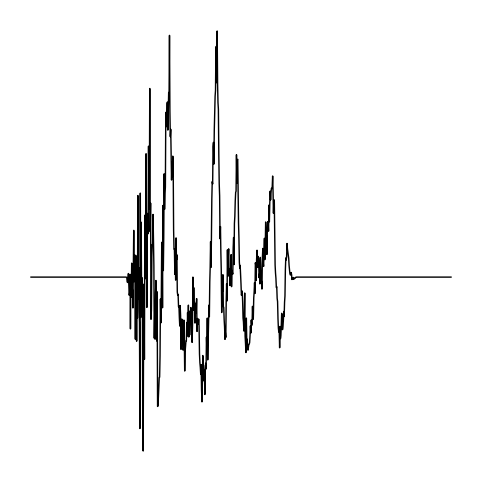

In [144]:
my_dpi = 100
fig, ax = plt.subplots(figsize=(6,6), dpi=my_dpi)
ax.plot(wavelength, main_wavelenght_t.iloc[:, 800], lw=1.0, ls='-', color='k', alpha=1)
ax.axis('off')
ax.set_box_aspect(1)
#ax.set_xlim(2500, 10000)
#ax.set_ylim(0,1)
plt.show()